Importamos las librerías:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import unicodedata
from scipy.stats import chi2_contingency
pd.options.mode.copy_on_write=True

# 2022

## Limpieza de datos

- Primero cargamos el dataset de acccidentalidad de Madrid del año 2022:

In [3]:
df_2022 = pd.read_csv(
    "../src/data/2022_Accidentalidad.csv",
    sep=";",
    skip_blank_lines=True,
    on_bad_lines="skip",
    encoding="utf-8"
)

Ahora tambien quiero ver sus dimensiones, es decir cuantas filas y columnas tiene el Dataset

In [4]:
df_2022.shape

(47053, 19)

- Aquí observamos que tiene 19 columnas igual que 2025, 2024 y 2023, y tiene 47053 filas

Observamos si tenemos duplicados:

In [5]:
df_duplicados = df_2022[df_2022.duplicated(keep = False)]
df_duplicados

num_expediente       fecha      hora  \
12       2022S000006  01/01/2022   5:15:00   
13       2022S000006  01/01/2022   5:15:00   
29       2022S000014  01/01/2022   7:45:00   
30       2022S000014  01/01/2022   7:45:00   
67       2022S000031  02/01/2022   0:55:00   
...              ...         ...       ...   
46927    2022S041190  30/12/2022  21:40:00   
46983    2022S041248  31/12/2022  13:09:00   
46984    2022S041248  31/12/2022  13:09:00   
46987    2022S041250  30/12/2022  16:18:00   
46988    2022S041250  30/12/2022  16:18:00   

                                    localizacion numero  cod_distrito  \
12                        CALL. JOSE ABASCAL, 30     30             7   
13                        CALL. JOSE ABASCAL, 30     30             7   
29                      CALL. DOCTOR CASTELO, 56     56             3   
30                      CALL. DOCTOR CASTELO, 56     56             3   
67                            CALL. CANAPIARE, 8      8            16   
...                                          ...    ...           ...   
46927                           AVDA. LOGROÑO, 2      2            16   
46983  CALL. ARGANDA / CALL. BAÑOS DE MONTEMAYOR      2             2   
46984  CALL. ARGANDA / CALL. BAÑOS DE MONTEMAYOR      2             2   
46987              CALL. OCAÑA / CALL. VALMOJADO      1            10   
46988              CALL. OCAÑA / CALL. VALMOJADO      1            10   

         distrito                tipo_accidente estado_meteorológico  \
12       CHAMBERÍ  Choque contra obstáculo fijo            Despejado   
13       CHAMBERÍ  Choque contra obstáculo fijo            Despejado   
29         RETIRO       Colisión fronto-lateral            Despejado   
30         RETIRO       Colisión fronto-lateral            Despejado   
67      HORTALEZA  Choque contra obstáculo fijo            Despejado   
...           ...                           ...                  ...   
46927   HORTALEZA       Colisión fronto-lateral            Despejado   
46983  ARGANZUELA       Colisión fronto-lateral            Despejado   
46984  ARGANZUELA       Colisión fronto-lateral            Despejado   
46987      LATINA              Colisión lateral            Despejado   
46988      LATINA              Colisión lateral            Despejado   

      tipo_vehiculo tipo_persona       rango_edad         sexo  cod_lesividad  \
12          Turismo    Conductor      Desconocido  Desconocido            NaN   
13          Turismo    Conductor      Desconocido  Desconocido            NaN   
29          Turismo    Conductor  De 30 a 34 años        Mujer            NaN   
30          Turismo    Conductor  De 30 a 34 años        Mujer            NaN   
67          Turismo    Conductor      Desconocido  Desconocido            NaN   
...             ...          ...              ...          ...            ...   
46927       Turismo    Conductor  De 25 a 29 años       Hombre            NaN   
46983       Turismo     Pasajero  De 40 a 44 años        Mujer           14.0   
46984       Turismo     Pasajero  De 40 a 44 años        Mujer           14.0   
46987       Turismo    Conductor  De 40 a 44 años       Hombre            NaN   
46988       Turismo    Conductor  De 40 a 44 años       Hombre            NaN   

                      lesividad  coordenada_x_utm  coordenada_y_utm  \
12                          NaN          440859.0         4476634.0   
13                          NaN          440859.0         4476634.0   
29                          NaN          442979.0         4474611.0   
30                          NaN          442979.0         4474611.0   
67                          NaN          446361.0         4480136.0   
...                         ...               ...               ...   
46927                       NaN          448402.0         4477882.0   
46983  Sin asistencia sanitaria          440012.0         4472169.0   
46984  Sin asistencia sanitaria          440012.0         4472169.0   
46987                       

In [6]:
df_duplicados.shape

(3486, 19)

In [7]:
df_2022 = df_2022.drop_duplicates(keep = "first")
df_2022.shape

(45065, 19)

Ahora para el formato real de los datos y detectar valores a simple vista

In [8]:
df_2022.head()

num_expediente       fecha     hora  \
0    2022S000001  01/01/2022  1:30:00   
1    2022S000001  01/01/2022  1:30:00   
2    2022S000002  01/01/2022  0:30:00   
3    2022S000002  01/01/2022  0:30:00   
4    2022S000002  01/01/2022  0:30:00   

                                 localizacion numero  cod_distrito  \
0                          AVDA. ALBUFERA, 19     19            13   
1                          AVDA. ALBUFERA, 19     19            13   
2  PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO      2             3   
3  PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO      2             3   
4  PLAZA. CANOVAS DEL CASTILLO / PASEO. PRADO      2             3   

             distrito           tipo_accidente estado_meteorológico  \
0  PUENTE DE VALLECAS                  Alcance            Despejado   
1  PUENTE DE VALLECAS                  Alcance            Despejado   
2              RETIRO  Colisión fronto-lateral                  NaN   
3              RETIRO  Colisión fronto-lateral                  NaN   
4              RETIRO  Colisión fronto-lateral                  NaN   

             tipo_vehiculo tipo_persona       rango_edad    sexo  \
0                  Turismo    Conductor  De 30 a 34 años   Mujer   
1                  Turismo    Conductor  De 45 a 49 años  Hombre   
2  Motocicleta hasta 125cc    Conductor  De 30 a 34 años  Hombre   
3  Motocicleta hasta 125cc     Pasajero  De 35 a 39 años   Mujer   
4                  Turismo    Conductor  De 40 a 44 años  Hombre   

   cod_lesividad lesividad  coordenada_x_utm  coordenada_y_utm  \
0            NaN       NaN          443359.0         4472082.0   
1            NaN       NaN          443359.0         4472082.0   
2            NaN       NaN          441155.0         4474129.0   
3            NaN       NaN          441155.0         4474129.0   
4            NaN       NaN          441155.0         4474129.0   

  positiva_alcohol  positiva_droga  
0                N             NaN  
1                N             NaN  
2                S             NaN  
3                N             NaN  
4                N             NaN

In [9]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45065 entries, 0 to 47052
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        45065 non-null  object 
 1   fecha                 45065 non-null  object 
 2   hora                  45065 non-null  object 
 3   localizacion          45065 non-null  object 
 4   numero                45065 non-null  object 
 5   cod_distrito          45065 non-null  int64  
 6   distrito              45065 non-null  object 
 7   tipo_accidente        45065 non-null  object 
 8   estado_meteorológico  40065 non-null  object 
 9   tipo_vehiculo         44866 non-null  object 
 10  tipo_persona          45065 non-null  object 
 11  rango_edad            45065 non-null  object 
 12  sexo                  45065 non-null  object 
 13  cod_lesividad         24568 non-null  float64
 14  lesividad             24568 non-null  object 
 15  coordenada_x_utm      45

Aquí procedemos a hacer una copia del dataset para dejar el original tal cual y poder ver diferencias a la hora de limpiar y demás.

In [10]:
df_2022_copy = df_2022.copy()

Vamos a generar una tabla para ver los nulos y la cardinalidad de las diferentes variables que nos ayudaran a tomar decisiones con cada variable.

In [11]:
# Número de nulos 
nulos = df_2022.isna().sum() 

# Porcentaje de nulos 
nulos_pct = (nulos / len(df_2022) * 100).round(2) 

# Cardinalidad 
card = df_2022.nunique() 

# Porcentaje de cardinalidad 
card_pct = (card / len(df_2022) * 100).round(2) 

# Tipo de dato 
tipos = df_2022.dtypes 

#Construcción de la tabla 
tabla_eda = pd.DataFrame({ 
    "nulos": nulos,
    "% nulos": nulos_pct,
    "cardinalidad": card, 
    "% cardinalidad": card_pct,
    "tipo": tipos }) 

# Ordenar por cardinalidad (o por nulos si prefieres) 
tabla_eda = tabla_eda.sort_values("cardinalidad", ascending=False) 
tabla_eda

nulos  % nulos  cardinalidad  % cardinalidad     tipo
num_expediente            0     0.00         20212           44.85   object
localizacion              0     0.00         15146           33.61   object
coordenada_y_utm         10     0.02         10802           23.97  float64
coordenada_x_utm         10     0.02         10111           22.44  float64
hora                      0     0.00          1207            2.68   object
numero                    0     0.00           913            2.03   object
fecha                     0     0.00           365            0.81   object
tipo_vehiculo           199     0.44            32            0.07   object
cod_distrito              0     0.00            21            0.05    int64
distrito                  0     0.00            21            0.05   object
rango_edad                0     0.00            18            0.04   object
tipo_accidente            0     0.00            13            0.03   object
cod_lesividad         20497    45.48             9            0.02  float64
lesividad             20497    45.48             9            0.02   object
estado_meteorológico   5000    11.10             7            0.02   object
tipo_persona              0     0.00             3            0.01   object
sexo                      0     0.00             3            0.01   object
positiva_alcohol        222     0.49             2            0.00   object
positiva_droga        44925    99.69             1            0.00  float64

In [12]:
df_2022["fecha"] = pd.to_datetime(df_2022["fecha"], errors="coerce", dayfirst=True) 
df_2022["hora"] = pd.to_datetime(df_2022["hora"], format="%H:%M:%S", errors="coerce").dt.time 
df_2022["fecha_hora"] = df_2022.apply( 
                            lambda row: pd.Timestamp.combine(row["fecha"], row["hora"])
                            if pd.notnull(row["fecha"]) and pd.notnull(row["hora"])
                            else pd.NaT,
                            axis=1 )

cols_string = ["num_expediente", "localizacion", "numero"] 
for col in cols_string: 
    df_2022[col] = df_2022[col].astype("string").str.lower().str.strip().str.replace(r"\s+", " ", regex=True)

- Ahora vamos a tratar los nulos 

In [13]:
# 1. ESTADO METEOROLÓGICO
df_2022['estado_meteorológico'] = df_2022['estado_meteorológico'].fillna('Se desconoce')

# 2. TIPO VEHÍCULO 
mask_no_aplica = df_2022['tipo_persona'].str.lower().isin(['peatón']) 

# Peatón y testigo → No aplica 
df_2022.loc[ mask_no_aplica & df_2022['tipo_vehiculo'].isna(), 'tipo_vehiculo' ] = 'No aplica'

# El resto de nulos → No consta 
df_2022['tipo_vehiculo'] = df_2022['tipo_vehiculo'].fillna('No consta') 

# 3. LESIVIDAD (ORDINAL) 
df_2022['cod_lesividad'] = df_2022['cod_lesividad'].fillna(14) 
df_2022['lesividad'] = df_2022['lesividad'].fillna('Sin asistencia sanitaria')

# 4. ALCOHOL
df_2022['positiva_alcohol'] = df_2022['positiva_alcohol'].fillna('No consta') 

# 5. NUMERO 
df_2022['numero'] = df_2022['numero'].fillna('No aplica')

# 6. TIPO DE ACCIDENTE
if 'tipo_accidente' in df_2022.columns:
    df_2022['tipo_accidente'] = (
        df_2022['tipo_accidente'].fillna('No consta')
    )


# Eliminamos la columna de drogas por la gran cantidad de nulos
df_2022 = df_2022.drop(columns = ["positiva_droga"])

- Ahora tratamos los nulos de las coordenadas X e Y:

In [14]:
df_nulos_geo = df_2022[
    df_2022[['coordenada_x_utm', 'coordenada_y_utm']].isna().any(axis=1)
]
df_nulos_geo

num_expediente      fecha      hora  \
802      2022s000436 2022-01-10  05:40:00   
42570    2022s036787 2022-12-01  11:25:00   
42571    2022s036787 2022-12-01  11:25:00   
43119    2022s037553 2022-12-04  15:35:00   
44197    2022s039457 2022-12-12  08:00:00   
44198    2022s039457 2022-12-12  08:00:00   
45310    2022s040326 2022-12-18  06:00:00   
47037    2022s041278 2022-12-31  17:17:00   
47038    2022s041278 2022-12-31  17:17:00   
47039    2022s041278 2022-12-31  17:17:00   

                                            localizacion numero  cod_distrito  \
802                           call. general ricardos, 15     15            11   
42570                           call. fernan gonzalez, 2      2             4   
42571                           call. fernan gonzalez, 2      2             4   
43119  call. dolores folgueras / call. pico de la mal...     3a            13   
44197                                       a42 km 6,300    162            12   
44198                                       a42 km 6,300    162            12   
45310               avda. albufera / ciudad de barcelona      1            13   
47037          call. raimundo fernandez villaverde / edg     47             6   
47038          call. raimundo fernandez villaverde / edg     47             6   
47039          call. raimundo fernandez villaverde / edg     47             6   

                 distrito           tipo_accidente estado_meteorológico  \
802           CARABANCHEL                    Caída         Se desconoce   
42570           SALAMANCA                  Alcance         Se desconoce   
42571           SALAMANCA                  Alcance         Se desconoce   
43119  PUENTE DE VALLECAS                    Caída              Nublado   
44197               USERA                  Alcance         Se desconoce   
44198               USERA                  Alcance         Se desconoce   
45310  PUENTE DE VALLECAS  Colisión fronto-lateral            Despejado   
47037              TETUÁN  Colisión fronto-lateral            Despejado   
47038              TETUÁN  Colisión fronto-lateral            Despejado   
47039              TETUÁN  Colisión fronto-lateral            Despejado   

                 tipo_vehiculo tipo_persona       rango_edad         sexo  \
802    Motocicleta hasta 125cc    Conductor  De 35 a 39 años       Hombre   
42570                Furgoneta    Conductor      Desconocido  Desconocido   
42571                  Turismo    Conductor  De 70 a 74 años       Hombre   
43119               Ciclomotor    Conductor  De 18 a 20 años       Hombre   
44197                  Turismo    Conductor  De 40 a 44 años       Hombre   
44198                  Turismo    Conductor  De 45 a 49 años        Mujer   
45310  Motocicleta hasta 125cc    Conductor  De 21 a 24 años       Hombre   
47037                  Turismo    Conductor  De 25 a 29 años       Hombre   
47038                  Turismo    Conductor  De 55 a 59 años       Hombre   
47039                  Turismo     Pasajero  De 25 a 29 años        Mujer   

       cod_lesividad                                          lesividad  \
802             14.0                           Sin asistencia sanitaria   
42570           14.0                           Sin asistencia sanitaria   
42571           14.0                           Sin asistencia sanitaria   
43119            7.0  Asistencia sanitaria sólo en el lugar del acci...   
44197           14.0                           Sin asistencia sanitaria   
44198           14.0                           Sin asistencia sanitaria   
45310            2.0                Ingreso inferior o igual a 24 horas   
47037           14.0                           Sin asistencia sanitaria   
47038           14.0                           Sin asistencia sanitaria   
47039           14.0                           Sin asistencia sanitaria   

       coordenada_x_utm  coordenada_y_utm positiva_alcohol          fecha_hora  
802                 NaN              

In [15]:
# 7. COORDENADAS UTM
# Buscamos la longitud y latitud en Google Maps en el caso de las calles,  y pasamos a coordenadas UTM
coords = {
    "2022s000436": (439121.0, 4472043.0),  # General Ricardos, 15
    "2022s036787": (442807.0, 4475161.0)   # Fernán González, 2
}

for exp, (x, y) in coords.items():
    df_2022.loc[
        df_2022['num_expediente'] == exp,
        'coordenada_x_utm'
    ] = x

    df_2022.loc[
        df_2022['num_expediente'] == exp,
        'coordenada_y_utm'
    ] = y

# El resto las eliminamos porque es difícil econtrar las coordenadas exactas
expedientes_a_eliminar = {
    "2022s037553",
    "2022s039457",
    "2022s040326",
    "2022s041278"
}
df_2022 = df_2022[
    ~df_2022["num_expediente"].isin(expedientes_a_eliminar)
]

In [16]:
# 8. NUEVA COLUMNA CON CATEGORÍA DE LESIVIDAD SIMPLIFICADA
df_2022["grado_lesividad"] = df_2022["cod_lesividad"].map({
    1: "Leve",
    2: "Leve",
    3: "Grave",
    4: "Fallecido",
    5: "Leve",
    6: "Leve",
    7: "Leve",
    14: "Sin asistencia sanitaria",
    77: "Se desconoce"
})

In [17]:
# 9. NORMALIZAR VALORES DE ALCOHOL (S/N → Positivo/Negativo)
mapa_alcohol = {
    "S": "Positivo",
    "N": "Negativo",
    "No consta": "No consta",
}
df_2022["positiva_alcohol"] = (
    df_2022["positiva_alcohol"]
    .map(mapa_alcohol)
    .fillna("No consta")   # por si aparece algún valor inesperado
)

In [18]:
# 10. CONVERTIR A CATEGORY (DESPUÉS DE IMPUTAR) 
cols_category = [ 'estado_meteorológico', 
                 'tipo_vehiculo', 
                 'tipo_persona', 
                 'tipo_accidente', 
                 'distrito', 
                 'cod_distrito', 
                 'rango_edad', 
                 'sexo', 
                 'cod_lesividad', 
                 'lesividad', 
                 'grado_lesividad'
                 ] 
for col in cols_category: 
    df_2022[col] = df_2022[col].astype('category')

In [19]:
# 11. CATEGORÍA DE FRANJAS HORARIAS

df_2022['franja_horaria'] = pd.cut(
        df_2022['fecha_hora'].dt.hour,
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

# 11. CAMBIO VALORES POSITIVA_ALCOHOL
df_2022["positiva_alcohol"] = df_2022["positiva_alcohol"].replace(
    {"S":"Si",
     "N":"No"}
)

In [20]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45058 entries, 0 to 47052
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        45058 non-null  string        
 1   fecha                 45058 non-null  datetime64[ns]
 2   hora                  45058 non-null  object        
 3   localizacion          45058 non-null  string        
 4   numero                45058 non-null  string        
 5   cod_distrito          45058 non-null  category      
 6   distrito              45058 non-null  category      
 7   tipo_accidente        45058 non-null  category      
 8   estado_meteorológico  45058 non-null  category      
 9   tipo_vehiculo         45058 non-null  category      
 10  tipo_persona          45058 non-null  category      
 11  rango_edad            45058 non-null  category      
 12  sexo                  45058 non-null  category      
 13  cod_lesividad        

Guardamos el dataset limpio a CSV y utilizamos parquet para que se conserven los tipos de datos:

In [21]:
df_2022.to_parquet("../src/data/2022_Accidentalidad_Limpio.parquet")

# Análisis Univariante

### Tendencias centrales

Miro la moda de las variables categóricas para ver qué valores tienen mayor frecuencia absoluta:

In [22]:
cols_categoricas = ["tipo_persona",
                    "distrito",
                    "localizacion",
                    "tipo_accidente",
                    "estado_meteorológico",
                    "rango_edad",
                    "lesividad",
                    "positiva_alcohol",
                    "tipo_vehiculo",
                    "sexo",
                    "franja_horaria",
                    "grado_lesividad"
                    ]

In [23]:
df_2022[cols_categoricas].mode().T

0
tipo_persona                         Conductor
distrito                    PUENTE DE VALLECAS
localizacion               autov. a-2, +00500e
tipo_accidente         Colisión fronto-lateral
estado_meteorológico                 Despejado
rango_edad                     De 25 a 29 años
lesividad             Sin asistencia sanitaria
positiva_alcohol                      Negativo
tipo_vehiculo                          Turismo
sexo                                    Hombre
franja_horaria                           Tarde
grado_lesividad       Sin asistencia sanitaria

### Análisis univariante temporal

In [24]:
def preparar_accidentes_unicos(df, col_id='num_expediente'):
    """
    Devuelve un DataFrame con accidentes únicos (agregados por num_expediente),
    usando la columna fecha_hora ya existente.
    """

    # Asegurar que fecha_hora es datetime
    df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

    # Agregación por expediente (1 fila = 1 accidente)
    df_unicos = df.groupby(col_id).agg({
        'fecha_hora': 'min',
        'tipo_accidente': 'first',
        'tipo_vehiculo': lambda x: list(x.unique()),
        'distrito': 'first',
        'estado_meteorológico': 'first',
        'rango_edad': 'first',
        'tipo_persona': 'first',
        'sexo': 'first',
        'positiva_alcohol': 'first'
    }).reset_index()

    # Variables temporales derivadas
    df_unicos['año'] = df_unicos['fecha_hora'].dt.year
    df_unicos['mes'] = df_unicos['fecha_hora'].dt.month
    df_unicos['dia_semana'] = df_unicos['fecha_hora'].dt.day_name()
    df_unicos['hora'] = df_unicos['fecha_hora'].dt.hour

    df_unicos['franja'] = pd.cut(
        df_unicos['hora'],
        bins=[0,6,12,18,24],
        labels=['Madrugada','Mañana','Tarde','Noche'],
        right=False
    )

    return df_unicos

In [25]:
def plot_temporal_univariate(df, col_datetime='fecha_hora', por_año=False):
    """
    Gráficos temporales univariantes:
    - Accidentes por mes (barras)
    - Accidentes por día de la semana
    - Accidentes por hora
    - Accidentes por franja horaria
    - Curva mensual ampliada (línea con puntos)
    - Curvas diarias por mes (12 gráficas adicionales)
    """
    if por_año:
        for año, df_año in df.groupby('año'):
            print(f"\n=== Gráficos para el año {año} ===")
            _graficos(df_año, col_datetime, titulo_extra=f"Año {año}")
    else:
        _graficos(df, col_datetime, titulo_extra="Global")


def _graficos(df, col_datetime, titulo_extra=""):

    fig = plt.figure(figsize=(16, 18))

    # 1. Accidentes por mes
    ax_mes = plt.subplot2grid((3, 2), (0, 0))
    freq_mes = df['mes'].value_counts().sort_index()
    freq_mes.plot(kind='bar', ax=ax_mes, color="steelblue",
                  title=f'Accidentes por mes ({titulo_extra})')
    ax_mes.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_mes.values):
        ax_mes.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 2. Accidentes por día de la semana
    ax_semana = plt.subplot2grid((3, 2), (0, 1))
    freq_semana = df['dia_semana'].value_counts()
    freq_semana.plot(kind='bar', ax=ax_semana, color="darkcyan",
                     title=f'Accidentes por día de la semana ({titulo_extra})')
    ax_semana.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_semana.values):
        ax_semana.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 3. Accidentes por hora
    ax_hora = plt.subplot2grid((3, 2), (1, 0))
    freq_hora = df['hora'].value_counts().sort_index()
    freq_hora.plot(kind='bar', ax=ax_hora, color="darkorange",
                   title=f'Accidentes por hora ({titulo_extra})')
    ax_hora.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_hora.values):
        ax_hora.text(i, v + 5, str(v), ha="center", fontsize=8)

    # 4. Accidentes por franja horaria
    ax_franja = plt.subplot2grid((3, 2), (1, 1))
    freq_franja = df['franja'].value_counts()
    freq_franja.plot(kind='bar', ax=ax_franja, color="mediumseagreen",
                     title=f'Accidentes por franja horaria ({titulo_extra})')
    ax_franja.set_ylabel("Número de accidentes")
    for i, v in enumerate(freq_franja.values):
        ax_franja.text(i, v + 5, str(v), ha="center", fontsize=9)

    # 5. Curva mensual ampliada
    ax_curva = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    frecuencia_mensual = df[col_datetime].dt.month.value_counts().sort_index()

    meses_es = [
        "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
        "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
    ]
    meses_plot = [meses_es[i-1] for i in frecuencia_mensual.index]

    ax_curva.plot(
        meses_plot, frecuencia_mensual.values,
        marker="o", linewidth=3, color="steelblue"
    )
    ax_curva.set_title(f"Curva de frecuencia mensual ({titulo_extra})", fontsize=14)
    ax_curva.set_xlabel("Mes")
    ax_curva.set_ylabel("Número de accidentes")
    ax_curva.grid(True)
    for i, v in enumerate(frecuencia_mensual.values):
        ax_curva.text(i, v + 10, str(v), ha="center", fontsize=10)
    ax_curva.tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()
    
    # 6. NUEVO: curvas diarias por mes (12 gráficas adicionales)
    
    for mes in range(1, 12 + 1):
        df_mes = df[df[col_datetime].dt.month == mes]
        if df_mes.empty:
            continue

        freq_dia = df_mes[col_datetime].dt.day.value_counts().sort_index()

        plt.figure(figsize=(10, 4))
        plt.plot(freq_dia.index, freq_dia.values, marker="o", linewidth=2, color="firebrick")
        plt.title(f"Curva diaria – {meses_es[mes-1]} ({titulo_extra})")
        plt.xlabel("Día del mes")
        plt.ylabel("Número de accidentes")
        plt.grid(True)

        for i, v in enumerate(freq_dia.values):
            plt.text(freq_dia.index[i], v + 0.5, str(v), ha="center", fontsize=8)

        plt.tight_layout()
        plt.show()

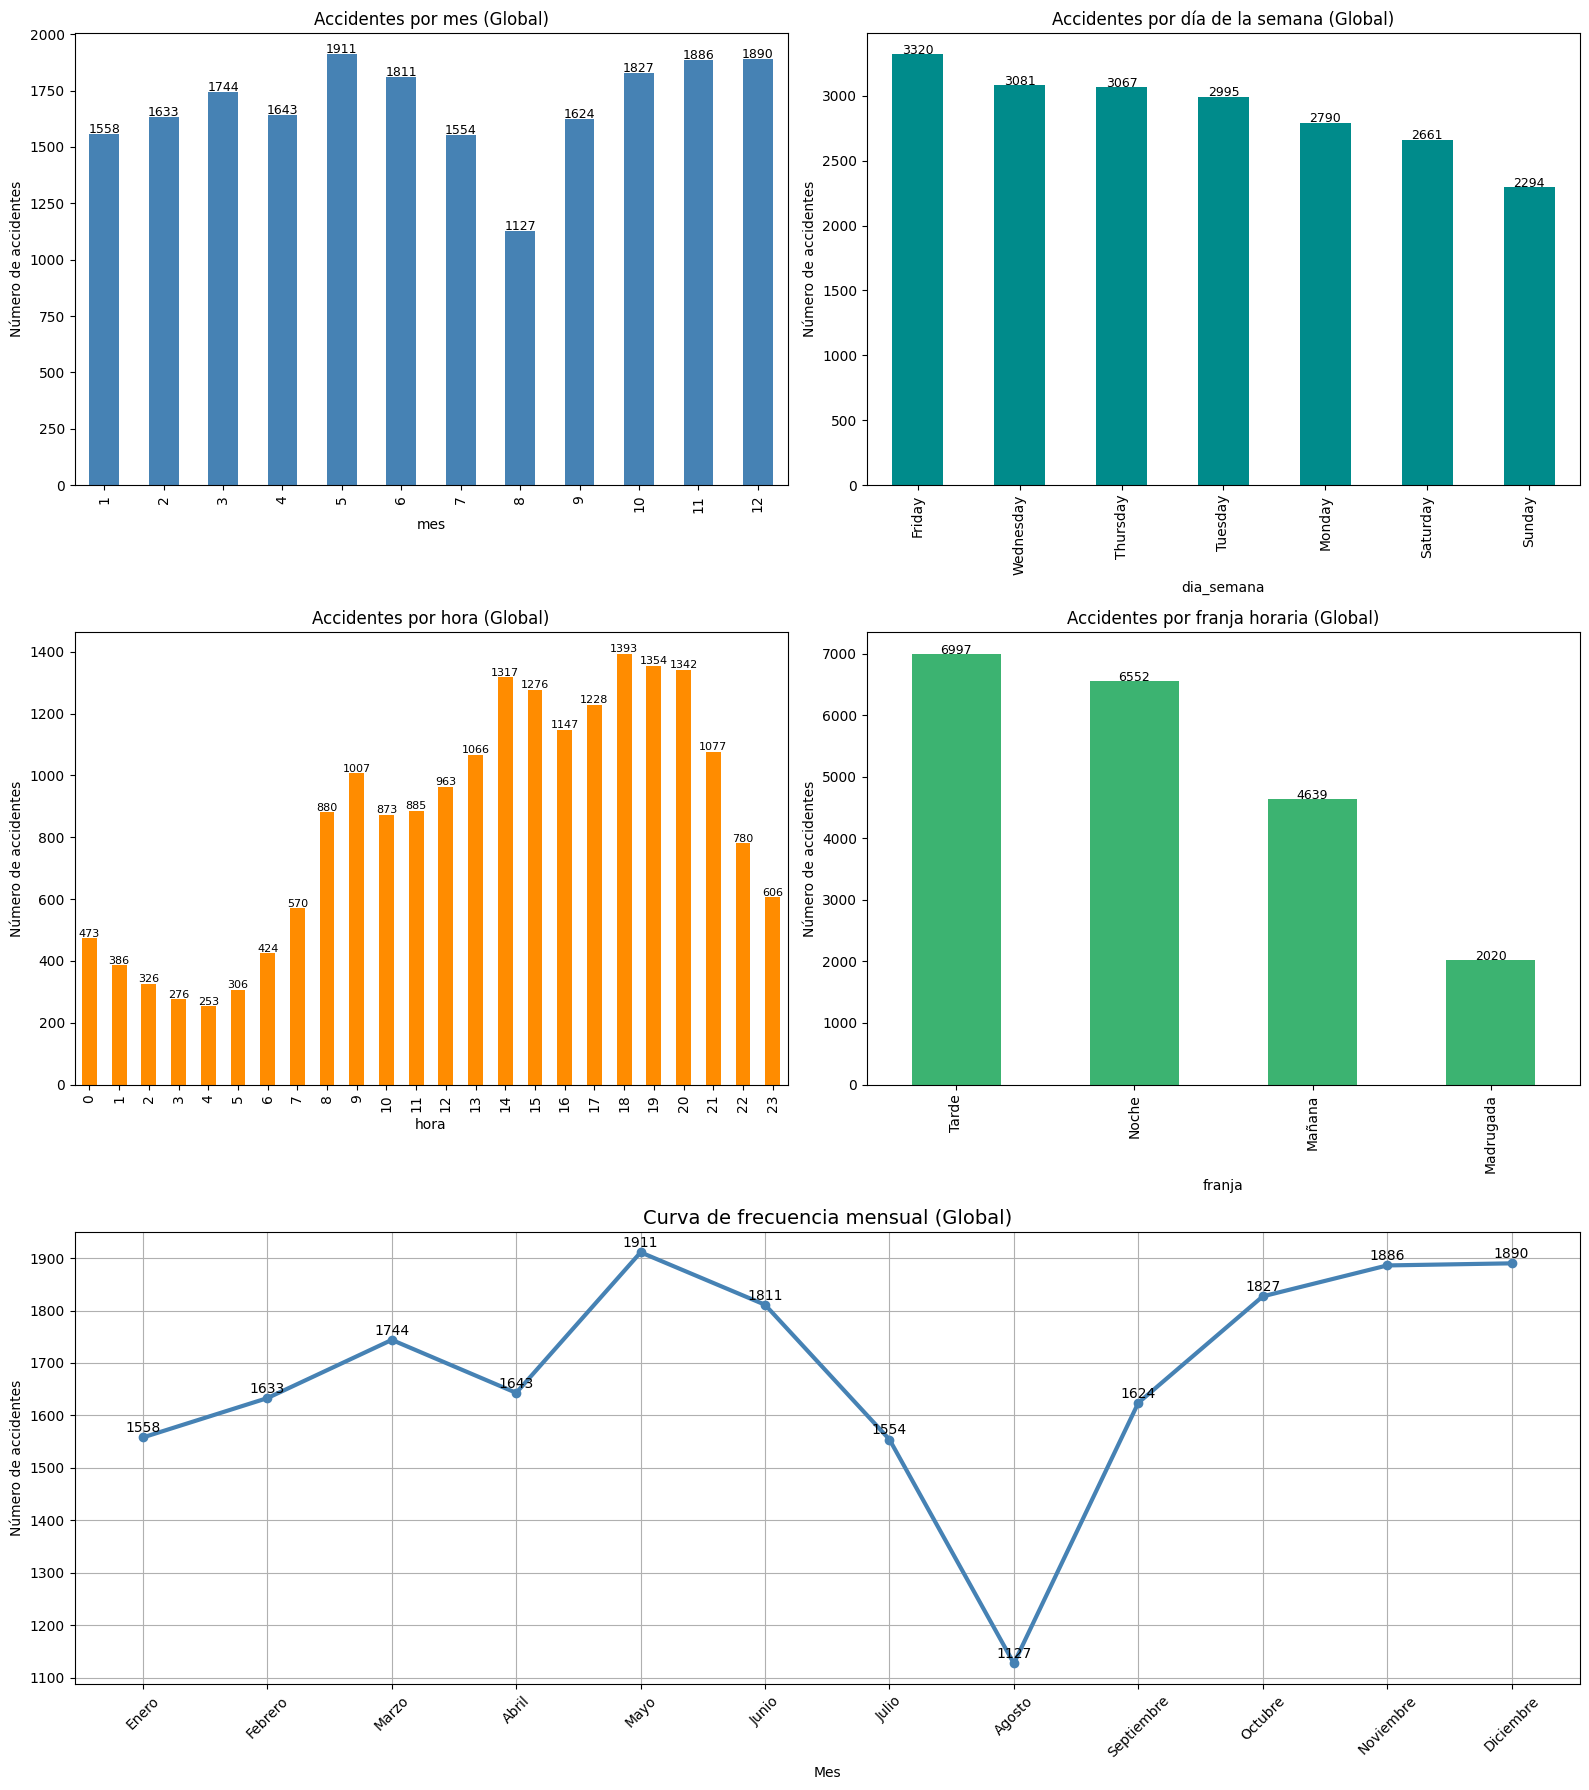

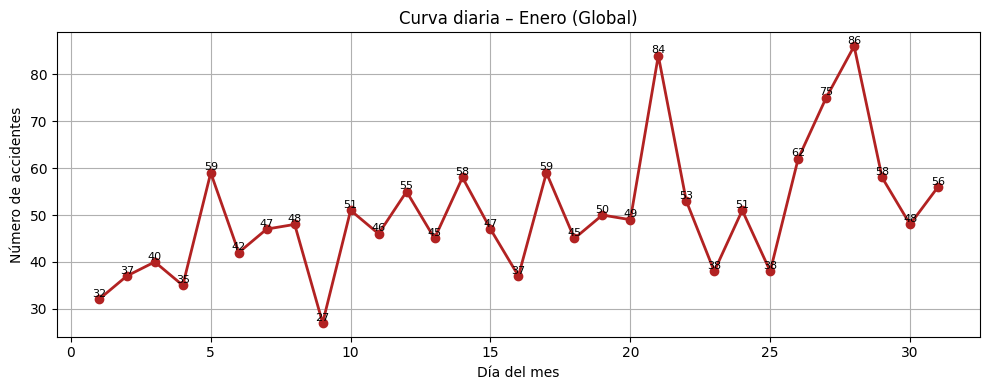

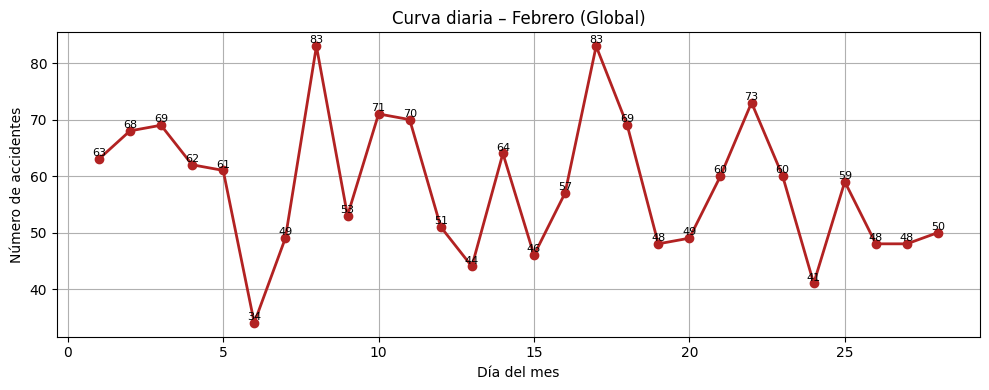

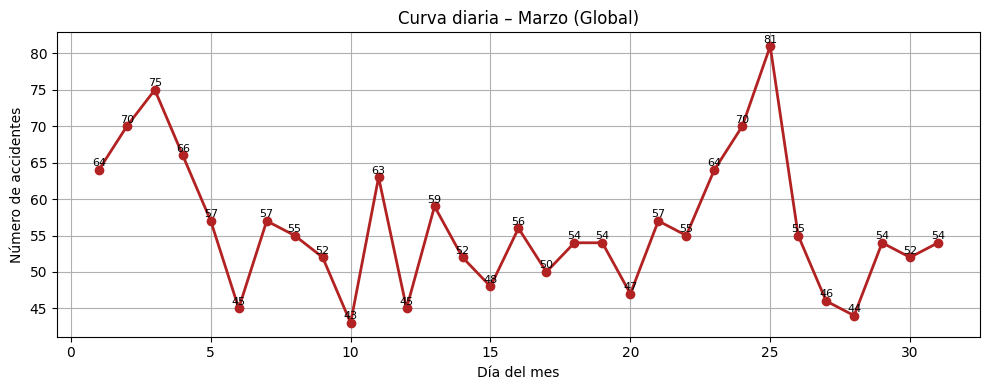

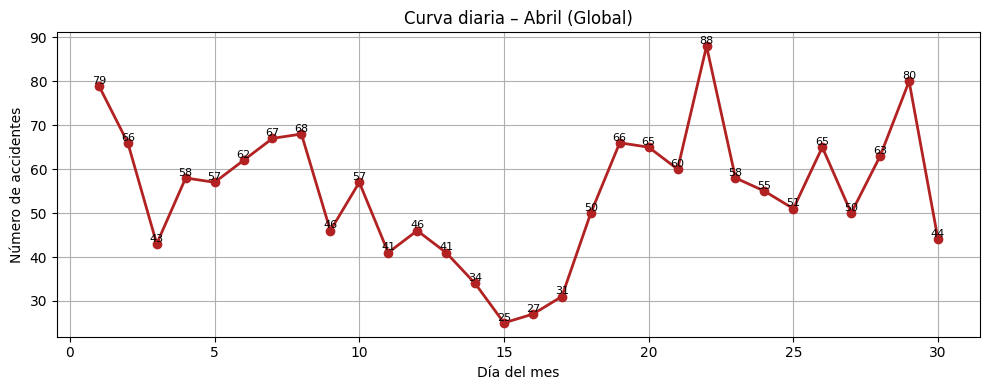

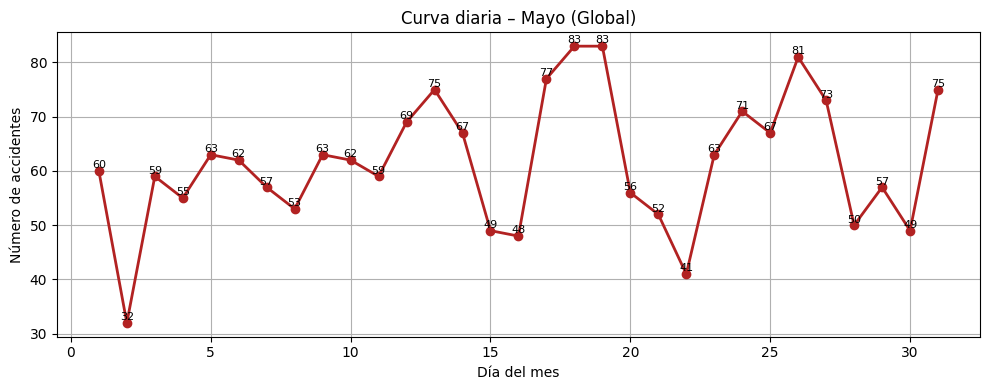

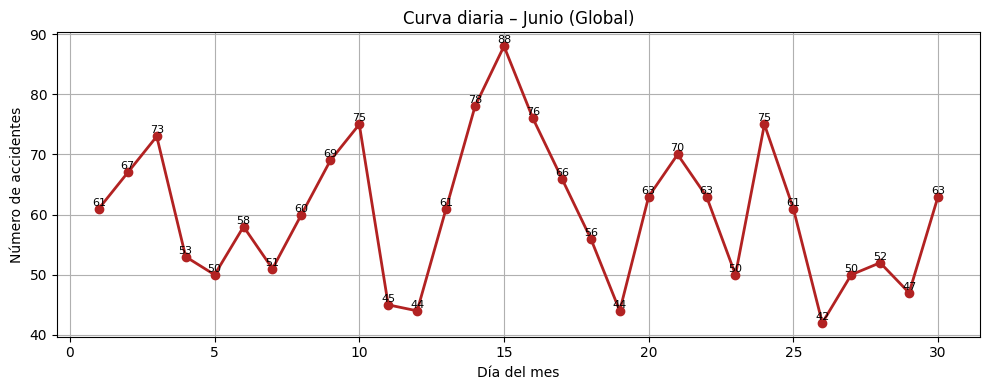

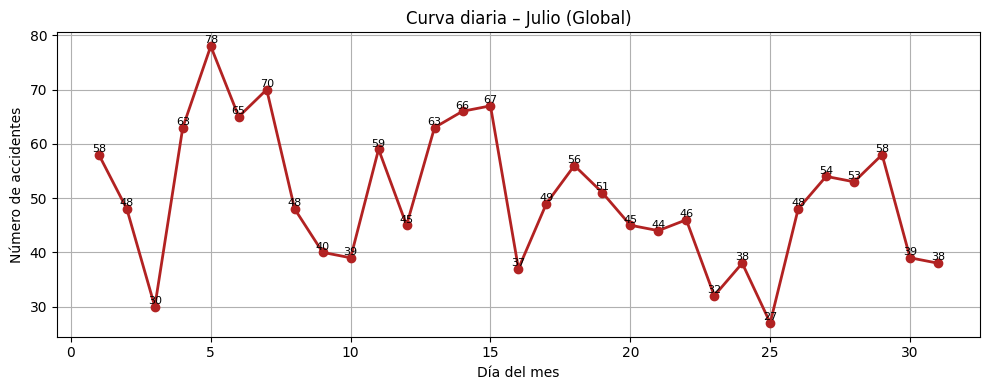

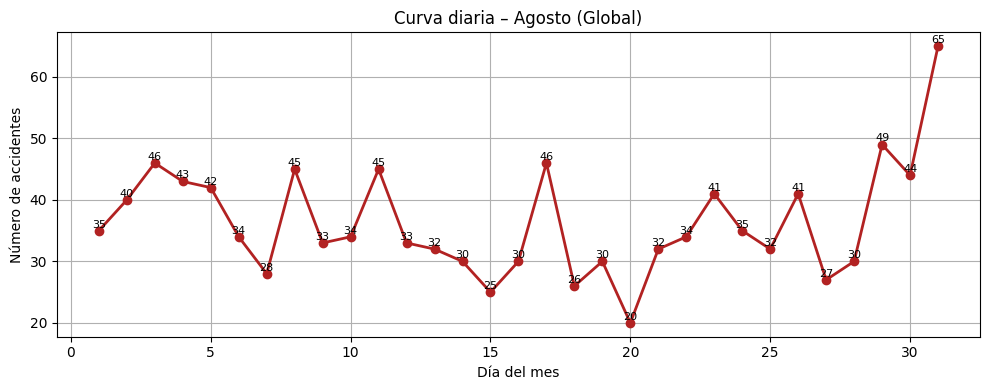

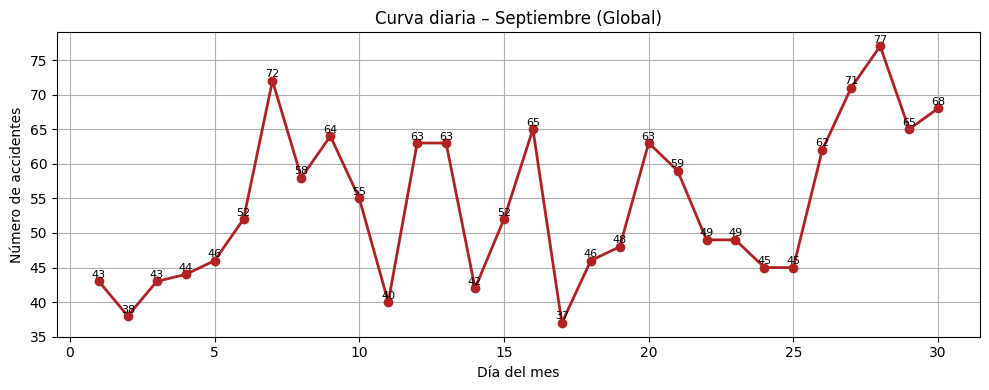

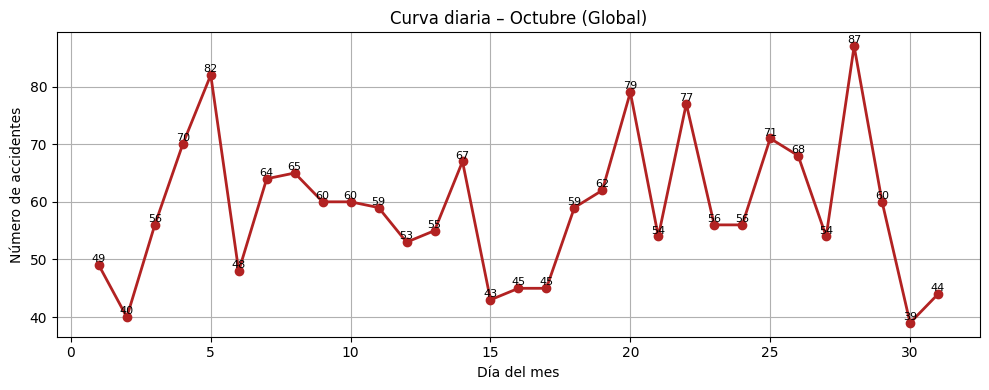

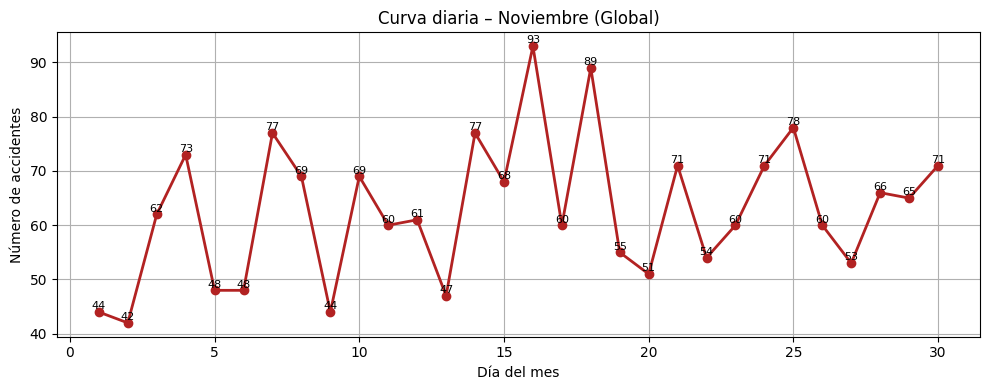

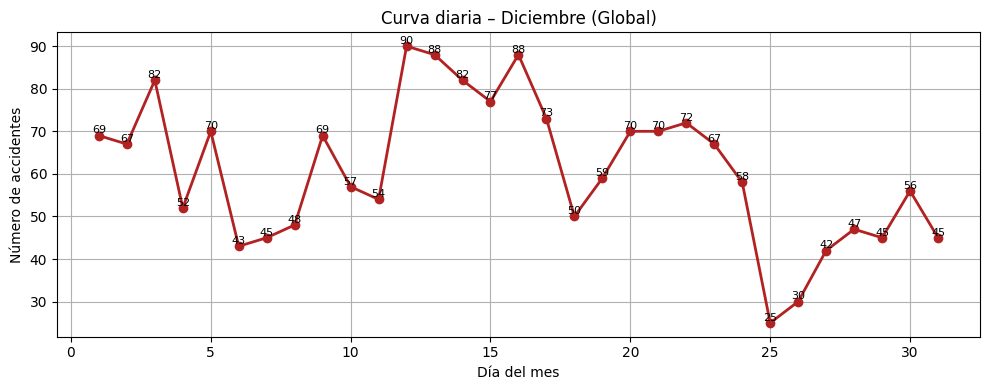

In [26]:
df_unicos = preparar_accidentes_unicos(df_2022)
plot_temporal_univariate(df_unicos)

1. En la primera gráfica se puede observar que los tres meses con más accidentes son Mayo, Noviembre y Diciembre. Y hay una clara bajada en Agosto. 
2. En la gráfica de accidente por día de la semana se puede observar que el día con más accidentes son los viernes y con menos los domingos.
3. En la gráfica de accidentes por hora vemos que las franjas con más accidentes son entre las 14:00 y las 15:00 (coindice con la salida del trabajo de mucha gente), y entre las 18:00 y las 20:00.
4. En la gráfica de accidentes por franja horaria, observamos que cuando más accidentes hay es por la tarde y por la noche.

Vamos con el análisis diario para cada mes:

##### Enero
- Caídas: días 1 (festivo) y 9 (domingo)
- Picos: días 21 y 28 (ambos viernes)
##### Febrero
- Caídas: día 6 (domingo)
- Picos: días 8 y 17
##### Marzo
- Caídas: días 6, 10, 12, 20 y 28 (salvo los días 6 y 28, fin de semana)
- Picos: días 3 y 25 (viernes)
##### Abril
- Caídas: del 15 al 17 (Semana Santa)
- Picos: días 22 y 29 (ambos viernes)
##### Mayo
- Caídas: día 2 (festivo)
- Picos: días 18, 19 y 26
##### Junio
- Caídas: días 11, 12, 19 y 26 (todos domingos menos el día 11)
- Picos: día 15
##### Julio
- Caídas: fines de semana y día 25 (festivo)
- Picos: día 5
##### Agosto
- Caídas: caída masiva
- Picos: día 31 (entrada a Septiembre y vuelta a trabajo)
##### Septiembre
- Caídas: fines de semana
- Picos: entre semana
##### Octubre
- Caídas: fines de semana
- Picos: días 5 y 28 (domingo)
##### Noviembre
- Caídas: fines de semana y festivos
- Picos: días 16 y 18 (viernes)
##### Diciembre
- Caídas: día 25 (festivo)
- Picos: del 12 al 16

### Análisis univariante geográfico

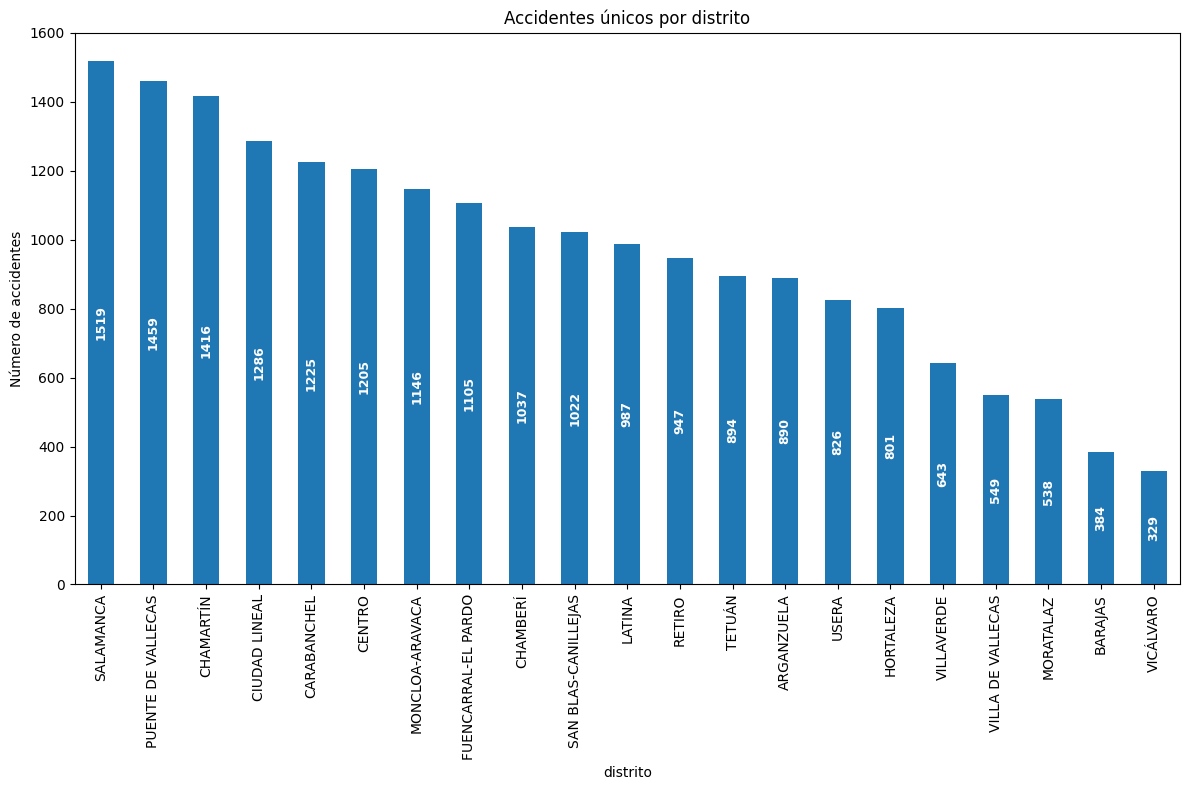

In [27]:
# Calcular accidentes únicos por distrito
accidentes_distrito = (
    df_2022
    .groupby("distrito", observed = False)["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Crear gráfico
ax = accidentes_distrito.plot(kind="bar", figsize=(12,8))

plt.title("Accidentes únicos por distrito")
plt.ylabel("Número de accidentes")

# Eje Y con saltos de 200
max_val = accidentes_distrito.max()
plt.yticks(np.arange(0, max_val + 200, 200))

# Añadir el número de accidentes dentro de cada barra, tumbado
for p, value in zip(ax.patches, accidentes_distrito):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax.annotate(
        f"{value}",
        (x, y),
        ha="center", va="center",
        rotation=90,          #  texto tumbado
        fontsize=9, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()

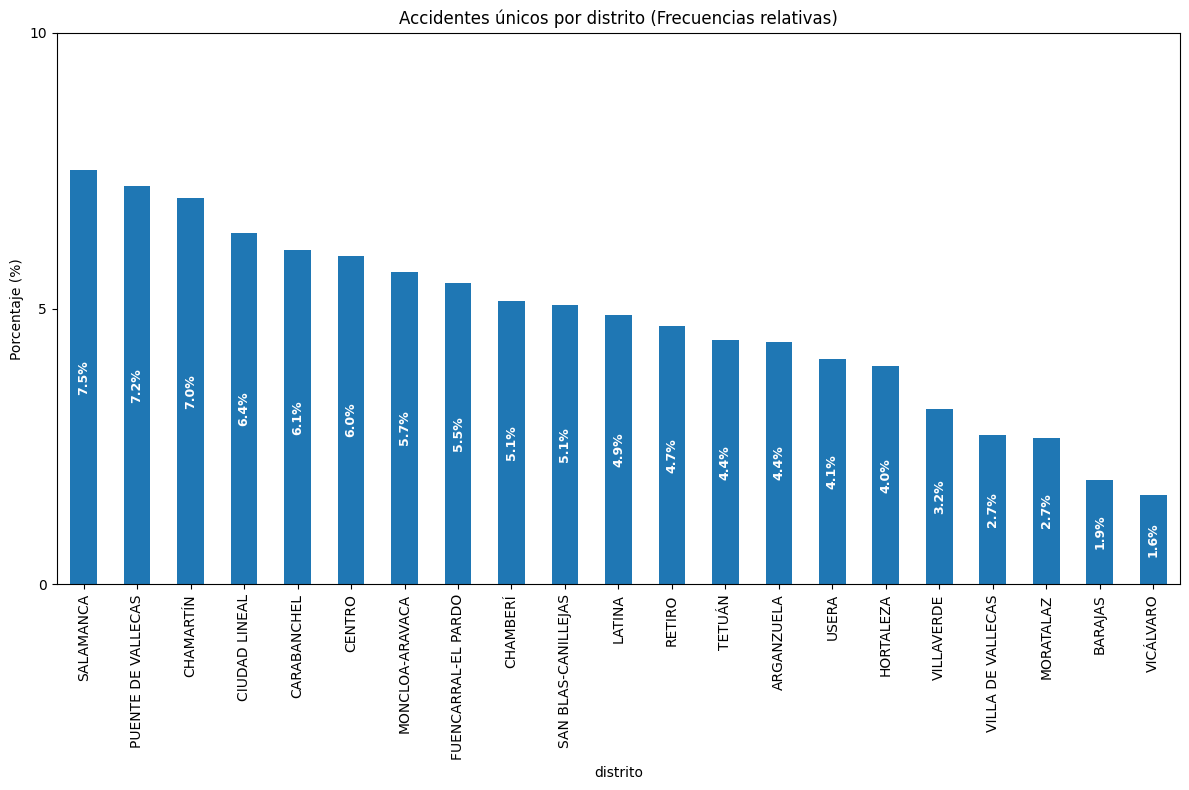

In [28]:
# Calcular accidentes únicos por distrito (absolutos)
accidentes_distrito = (
    df_2022
    .groupby("distrito", observed = False)["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Convertir a frecuencias relativas (%)
accidentes_rel = accidentes_distrito / accidentes_distrito.sum() * 100

# Crear gráfico
ax = accidentes_rel.plot(kind="bar", figsize=(12,8))

plt.title("Accidentes únicos por distrito (Frecuencias relativas)")
plt.ylabel("Porcentaje (%)")

# Eje Y con saltos de 5%
max_val = accidentes_rel.max()
plt.yticks(np.arange(0, max_val + 5, 5))

# Añadir el porcentaje dentro de cada barra, tumbado
for p, value in zip(ax.patches, accidentes_rel):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2   # centrado verticalmente dentro de la barra

    ax.annotate(
        f"{value:.1f}%",      # porcentaje con 1 decimal
        (x, y),
        ha="center", va="center",
        rotation=90,
        fontsize=9, color="white", fontweight="bold"
    )

plt.tight_layout()
plt.show()

La mayor concentración de accidentes se encuentra en los distristos más céntricos. Tanto en términos absolutos como relativos, los distritos con más accidentes son Puente de Vallecas, Salamanca y Chamartín, y con menos son Barajas y Vicálvaro.

A continuación vemos los puntos negros:

In [29]:
# 1. Funciones de normalización
def normalize_text(s):
    """Normaliza texto: minúsculas, espacios, sin tildes."""
    if pd.isna(s):
        return None
    s = s.lower().strip()
    s = " ".join(s.split())  # elimina dobles espacios
    s = ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
    return s

def normalize_numero(n):
    """Normaliza número de portal, detecta S/N."""
    if pd.isna(n):
        return None
    n = str(n).lower().strip()
    if n in ['s/n', 'sn', 's-n', '']:
        return None
    return n

# 2. Normalización de columnas clave


df = df_2022.copy()

df['localizacion_norm'] = df['localizacion'].apply(normalize_text)
df['numero_norm'] = df['numero'].apply(normalize_numero)
df['num_expediente'] = df['num_expediente'].astype(str).str.strip()

# eliminar duplicados exactos de num expediente
df = df.drop_duplicates(subset=['num_expediente'])


# 3. Construcción de clave de localización final


df['clave_localizacion'] = (
    df['localizacion_norm'].fillna('') + ' ' +
    df['numero_norm'].fillna('')
).str.strip()

# 4. Detección de puntos negros con distrito

puntos_negros = (
    df.groupby(['localizacion_norm', 'distrito'], observed = False)['num_expediente']
      .nunique()
      .reset_index(name='n_expedientes')
      .sort_values('n_expedientes', ascending=False)
)

# filtrar solo localizaciones con más de un accidente distinto
puntos_negros = puntos_negros[puntos_negros['n_expedientes'] > 1]

# 5. Resultado final
puntos_negros

localizacion_norm            distrito  \
1434                                  autov. a-2, +00500e       CIUDAD LINEAL   
3545                                 autov. a-42, +00500e               USERA   
3551                                 autov. a-42, +00500s         CARABANCHEL   
217942  call. principe de vergara / call. francisco si...           CHAMARTÍN   
11907                                autov. m-30, +01100i          ARGANZUELA   
...                                                   ...                 ...   
315843                                ronda. valencia, 10              CENTRO   
315906                                 ronda. valencia, 8              CENTRO   
317385                     uni. politecnica campus sur, 0  PUENTE DE VALLECAS   
69362                   avda. real de pinto / autov. m-45          VILLAVERDE   
317445                                          valmojado              LATINA   

        n_expedientes  
1434               33  
3545               23  
3551               22  
217942             22  
11907              21  
...               ...  
315843              2  
315906              2  
317385              2  
69362               2  
317445              2  

[2571 rows x 3 columns]

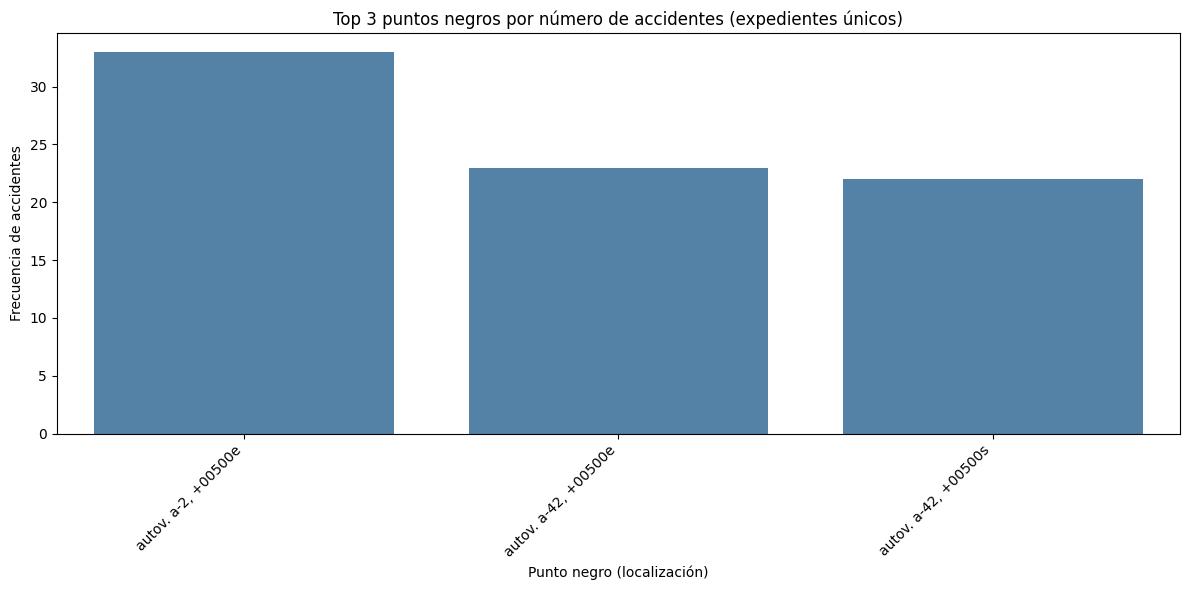

In [30]:
# Seleccionar los 5 puntos negros con más accidentes
top3 = puntos_negros.nlargest(3, 'n_expedientes').copy()

# Resetear índice para evitar problemas de posición
top3 = top3.reset_index(drop=True)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=top3,
    x='localizacion_norm',
    y='n_expedientes',
    color='steelblue'
)

plt.title('Top 3 puntos negros por número de accidentes (expedientes únicos)')
plt.xlabel('Punto negro (localización)')
plt.ylabel('Frecuencia de accidentes')

# Rotar etiquetas del eje X para que se lean bien
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Mismos puntos negros que en 2024 y 2023.

### Análisis univariante por tipo de accidente

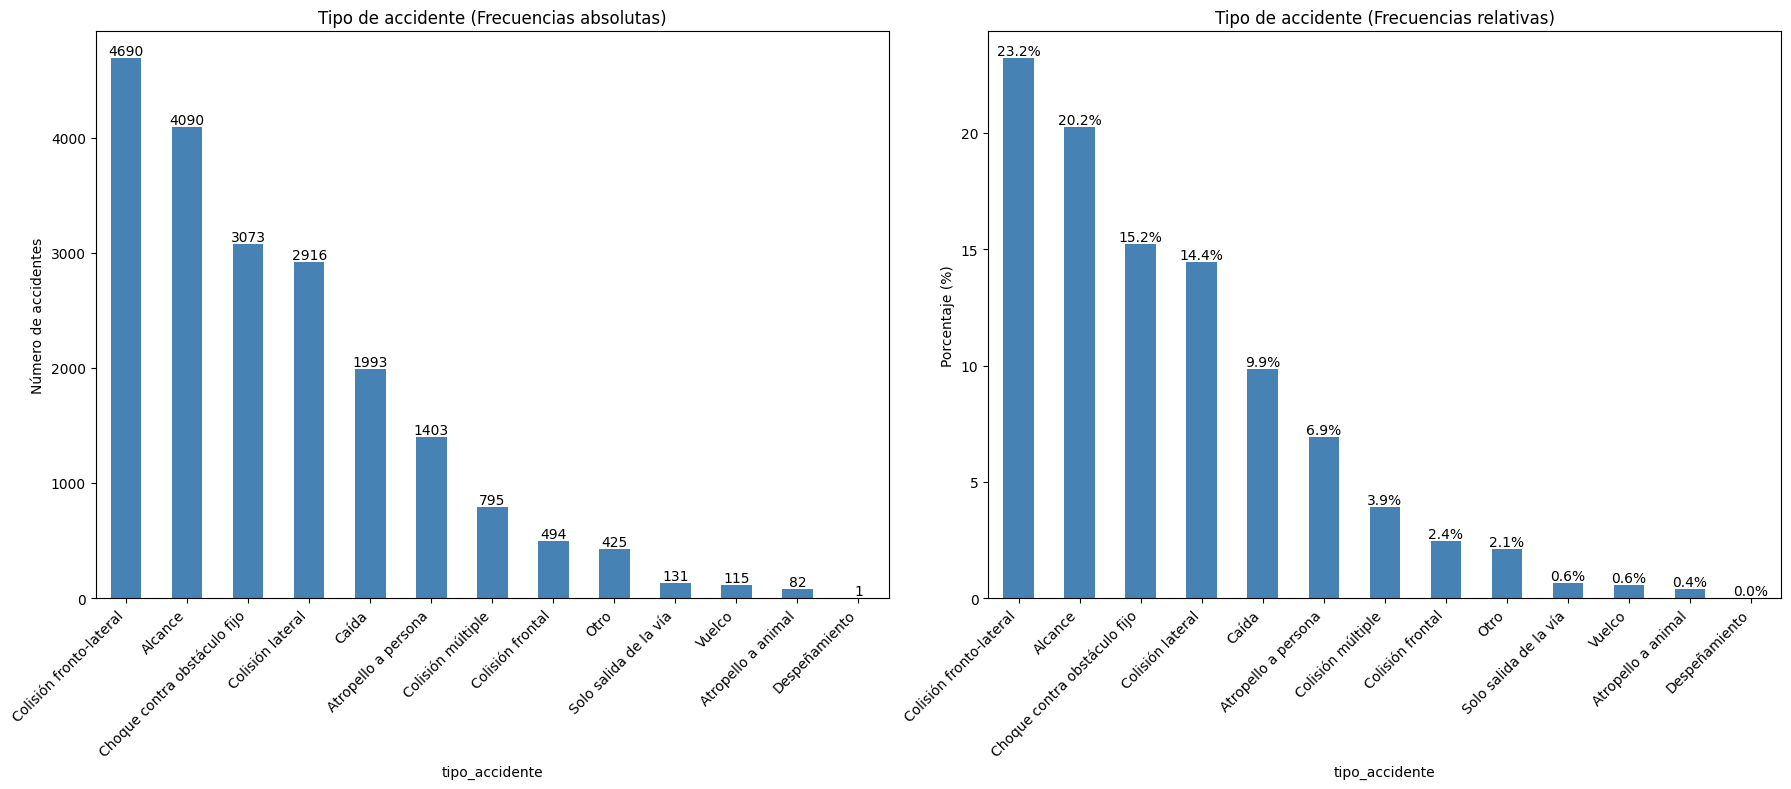

In [31]:
# Crear columna limpia
df = df_2022.copy()
df["tipo_accidente_limpio"] = df["tipo_accidente"].str.strip().str.lower()

# Filtrar "no consta" 
df_filtrado = df[df["tipo_accidente_limpio"] != "no consta"]

# Calcular frecuencias absolutas
abs_freq = (
    df_filtrado
    .groupby("tipo_accidente", observed = False)["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Eliminar categorías con valor 0 (por si acaso)
abs_freq = abs_freq[abs_freq > 0]

# Calcular frecuencias relativas 
rel_freq = abs_freq / abs_freq.sum() * 100

# Eliminar categorías con valor 0 (por si acaso) 
rel_freq = rel_freq[rel_freq > 0]

# Crear gráfico 
plt.figure(figsize=(18, 8))

# Frecuencias absolutas
plt.subplot(1, 2, 1)
abs_freq.plot(kind="bar", color="steelblue")

plt.title("Tipo de accidente (Frecuencias absolutas)")
plt.ylabel("Número de accidentes")
plt.xticks(rotation=45, ha="right")

# Etiquetas numéricas encima de cada barra
for i, v in enumerate(abs_freq):
    plt.text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()

# Frecuencias relativas
plt.subplot(1, 2, 2)
rel_freq.plot(kind="bar", color="steelblue")

plt.title("Tipo de accidente (Frecuencias relativas)")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

# Etiquetas numéricas encima de cada barra
for i, v in enumerate(rel_freq):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

De nuevo la colisión fronto-lateral, representa casi una cuarta parte de todos los accidentes registrados. Junto con alcance, colisión lateral y choque contra obstáculo fijo suman más del 70%. 

### Análisis univariante por tipo de persona implicada en los accidentes y por vehículo

C:\Users\lufue\AppData\Local\Temp\ipykernel_37100\3427040743.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(abs_freq.index, rotation=45, ha="right")
C:\Users\lufue\AppData\Local\Temp\ipykernel_37100\3427040743.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rel_freq.index, rotation=45, ha="right")


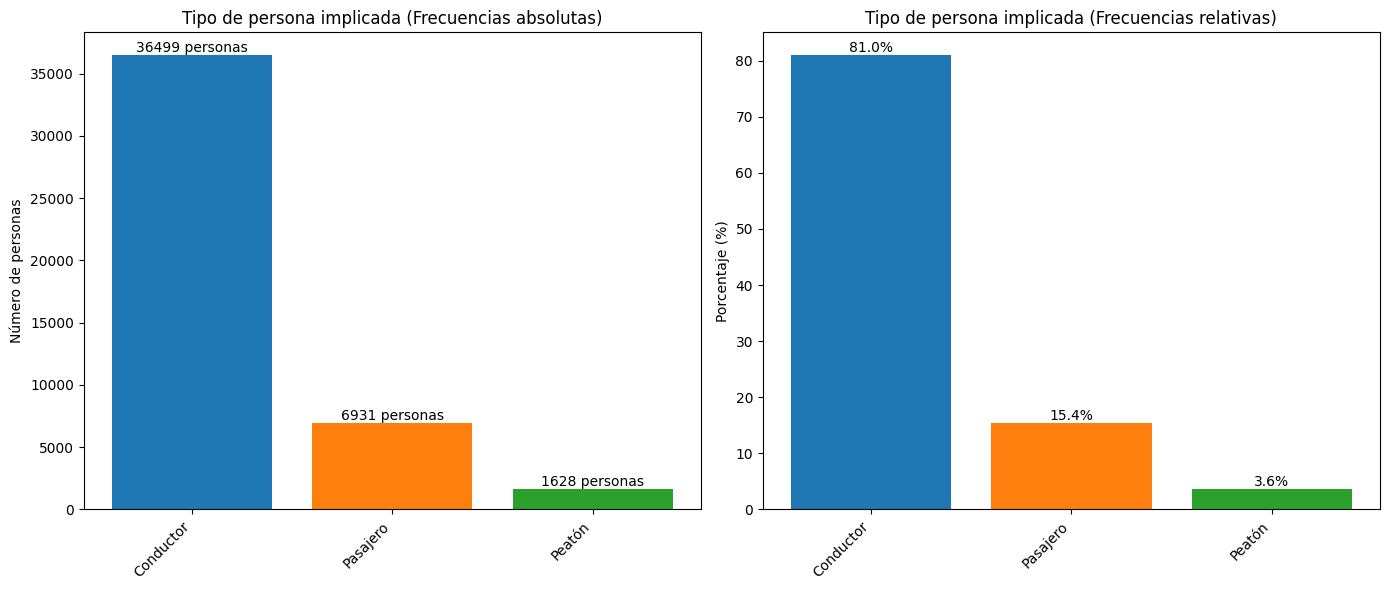

In [32]:
# Frecuencias absolutas (personas)
abs_freq = (
    df_2022["tipo_persona"]
    .value_counts()
)

# Frecuencias relativas (%)
rel_freq = abs_freq / abs_freq.sum() * 100

# Paleta de colores consistente
colors = sns.color_palette("tab10", n_colors=len(abs_freq))

# Crear figura con dos subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Absolutas (izquierda) 
axes[0].bar(abs_freq.index, abs_freq.values, color=colors)
axes[0].set_title("Tipo de persona implicada (Frecuencias absolutas)")
axes[0].set_ylabel("Número de personas")

# Rotación y alineación de etiquetas del eje X
axes[0].set_xticklabels(abs_freq.index, rotation=45, ha="right")

# Etiquetas encima de cada barra
for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v} personas", ha="center", va="bottom", fontsize=10)

# Gráfico 2: Relativas (derecha)
axes[1].bar(rel_freq.index, rel_freq.values, color=colors)
axes[1].set_title("Tipo de persona implicada (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")

# Rotación y alineación de etiquetas del eje X
axes[1].set_xticklabels(rel_freq.index, rotation=45, ha="right")

# Etiquetas encima de cada barra
for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

Los conductores es el principal grupo involucrado en accidentes, representando más de un 80%. Los peatones son los menos involucrados, pero los más vulnerables.

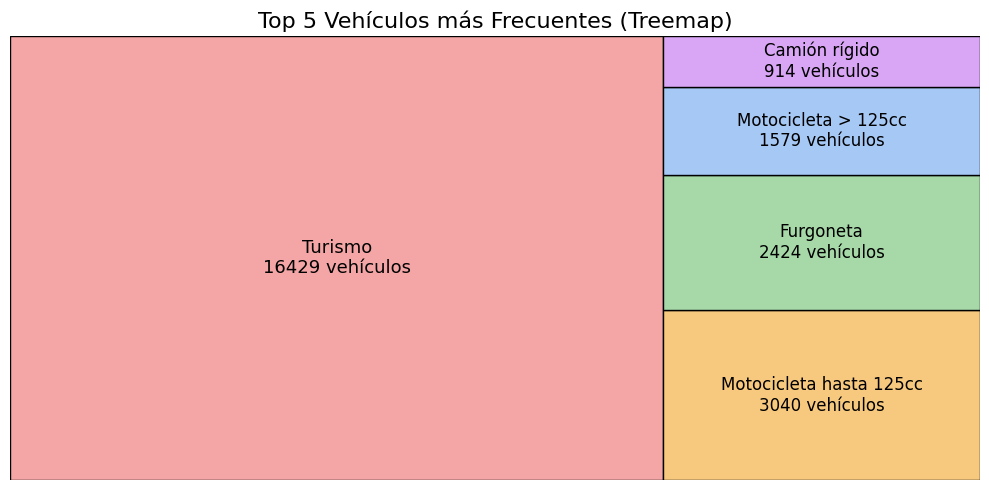

In [33]:
from matplotlib.patches import Rectangle

# 1. Filtrar solo conductores 
df_conductores = df_2022[
    df_2022["tipo_persona"].str.strip().str.lower() == "conductor"
]

# 2. Evitar duplicados reales 
df_vehiculos = df_conductores[["num_expediente", "tipo_vehiculo"]].drop_duplicates()

# 3. Contar los 5 vehículos más frecuentes 
vehiculo_freq = (
    df_vehiculos["tipo_vehiculo"]
    .str.strip()
    .value_counts()
    .head(5)
)

labels = vehiculo_freq.index.tolist()
sizes = vehiculo_freq.values.tolist()

# 4. Normalizar tamaños 
total = sum(sizes)
norm_sizes = [s / total for s in sizes]

# 5. Crear treemap estilo “bloque grande + 4 apilados”
fig, ax = plt.subplots(figsize=(10, 5))

# Área total
W, H = 100, 100

# Bloque principal (izquierda)
main_width = W * norm_sizes[0]          # proporcional
main_height = H

# Dibujar bloque principal
ax.add_patch(Rectangle((0, 0), main_width, main_height,
                       facecolor="#f4a6a6", edgecolor="black"))
ax.text(main_width/2, main_height/2,
        f"{labels[0]}\n{sizes[0]} vehículos",
        ha="center", va="center", fontsize=13)

# Bloques apilados (derecha)
x_right = main_width
y = 0
right_width = W - main_width

# Normalizar tamaños de los 4 restantes dentro del área derecha
rest_sizes = norm_sizes[1:]
rest_total = sum(rest_sizes)
rest_norm = [s / rest_total for s in rest_sizes]

colores = ["#f7c97f", "#a6d8a8", "#a6c8f4", "#d8a6f4"]

for i in range(4):
    block_height = H * rest_norm[i]     # proporcional
    ax.add_patch(Rectangle((x_right, y), right_width, block_height,
                           facecolor=colores[i], edgecolor="black"))
    ax.text(x_right + right_width/2, y + block_height/2,
            f"{labels[i+1]}\n{sizes[i+1]} vehículos",
            ha="center", va="center", fontsize=12)
    y += block_height

# ------------------ 6. Estética final ------------------
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.axis("off")
plt.title("Top 5 Vehículos más Frecuentes (Treemap)", fontsize=16)
plt.tight_layout()
plt.show()

El turismo es el vehículo más implicado con diferencia, seguido de las motocicletas (125cc y > 125cc) aunque en menor medida.

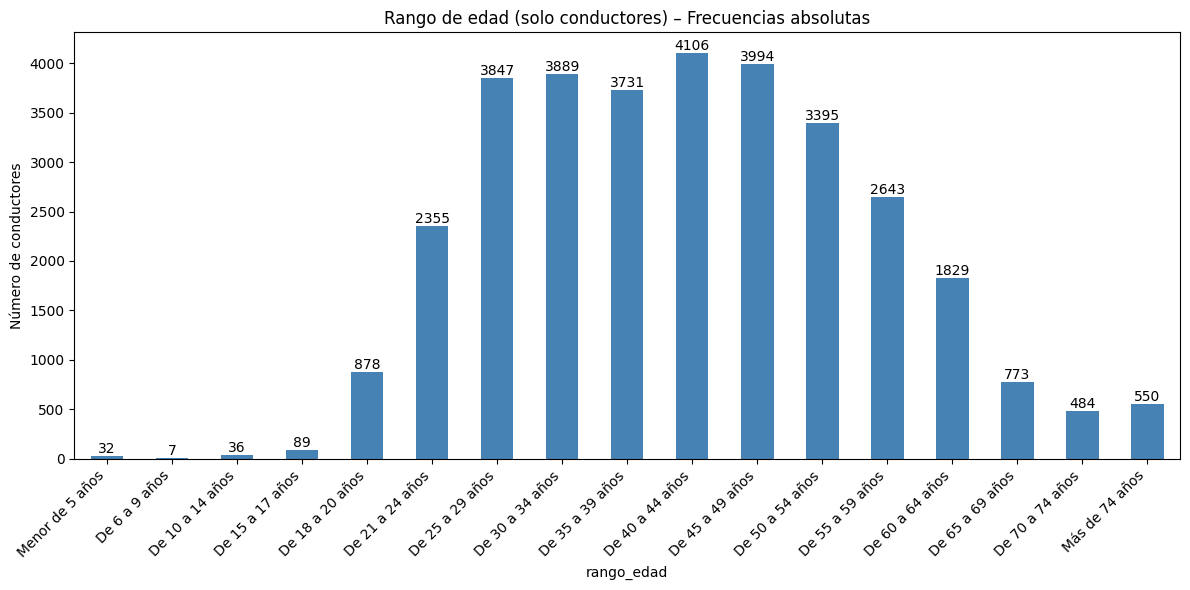

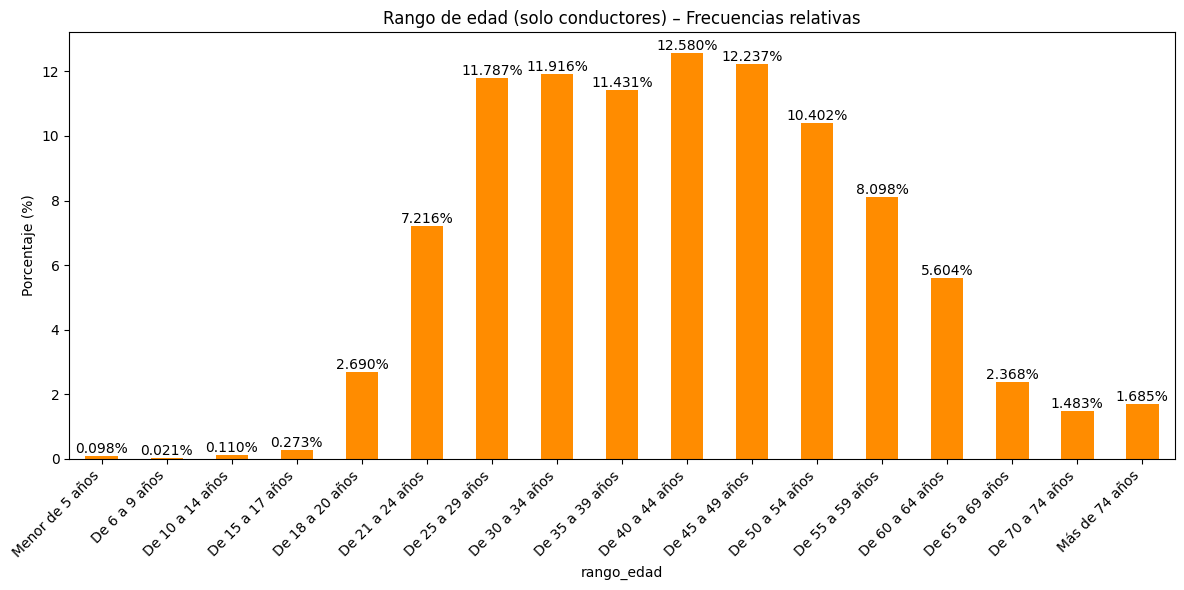

In [34]:
# 1. Filtrar solo conductores 
df_conductores = df_2022[
    df_2022["tipo_persona"].str.strip().str.lower() == "conductor"
]

# 2. Eliminar categoría "Desconocido" 
df_conductores = df_conductores[
    df_conductores["rango_edad"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto de rangos de edad 
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]

df_conductores["rango_edad"] = df_conductores["rango_edad"].str.strip()
df_conductores["rango_edad"] = df_conductores["rango_edad"].astype("category")
df_conductores["rango_edad"] = df_conductores["rango_edad"].cat.set_categories(
    orden_edad, ordered=True
)

# 4. Frecuencias
edad_abs = df_conductores["rango_edad"].value_counts().sort_index()
edad_rel = edad_abs / edad_abs.sum() * 100

# 5. Gráfico de frecuencias absolutas 
plt.figure(figsize=(12, 6))
edad_abs.plot(kind="bar", color="steelblue")

plt.title("Rango de edad (solo conductores) – Frecuencias absolutas")
plt.ylabel("Número de conductores")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_abs):
    if v > 0:
        plt.text(i, v, f"{v}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# 6. Gráfico de frecuencias relativas 
plt.figure(figsize=(12, 6))
edad_rel.plot(kind="bar", color="darkorange")

plt.title("Rango de edad (solo conductores) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_rel):
    if v > 0:
        plt.text(i, v, f"{v:.3f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

Mismo análisis que en 2023.

A continuación veamos si hay posibles ilegalidades:

In [35]:
df_conductores_6_9 = df_2022[
    (df_2022["tipo_persona"].str.strip().str.lower() == "conductor") &
    (df_2022["rango_edad"].str.strip() == "De 6 a 9 años")
]

df_conductores_6_9.tipo_vehiculo.unique()

['Bicicleta', 'Patinete no eléctrico']
Categories (34, object): ['Ambulancia SAMUR', 'Autobus EMT', 'Autobús', 'Autobús articulado', ..., 'Tractocamión', 'Turismo', 'VMU eléctrico', 'Vehículo articulado']

Los vehículos son todos bicicletas y patinetes no eléctricos, así que todo correcto.

In [36]:
df_2022.tipo_vehiculo.value_counts().index

CategoricalIndex(['Turismo', 'Motocicleta hasta 125cc', 'Furgoneta',
                  'Motocicleta > 125cc', 'Autobús', 'Camión rígido',
                  'Bicicleta', 'VMU eléctrico', 'Ciclomotor', 'Todo terreno',
                  'Tractocamión', 'No consta', 'Otros vehículos con motor',
                  'Bicicleta EPAC (pedaleo asistido)', 'Maquinaria de obras',
                  'Autobús articulado', 'Vehículo articulado',
                  'Sin especificar', 'Autobus EMT', 'No aplica',
                  'Cuadriciclo ligero', 'Ciclo', 'Autocaravana',
                  'Cuadriciclo no ligero', 'Ambulancia SAMUR',
                  'Patinete no eléctrico', 'Otros vehículos sin motor',
                  'Moto de tres ruedas > 125cc',
                  'Ciclomotor de dos ruedas L1e-B', 'Remolque',
                  'Autobús articulado EMT', 'Camión de bomberos',
                  'Moto de tres ruedas hasta 125cc', 'Semiremolque'],
                 categories=['Ambulancia SAMUR', 'Aut

In [37]:
vehiculos_legales = ['VMU eléctrico', 'Bicicleta', 'Bicicleta EPAC (pedaleo asistido)',
                     'Otros vehículos sin motor', 'Patinete no eléctrico']

df_10_14_ilegales = df_2022[
    (df_2022["tipo_persona"].str.lower().str.strip() == "conductor") &
    (df_2022["rango_edad"].str.strip() == "De 10 a 14 años") &
    (~df_2022["tipo_vehiculo"].isin(vehiculos_legales))
]

print(df_10_14_ilegales.shape)
df_10_14_ilegales.tipo_vehiculo.unique()

(1, 21)


['Turismo']
Categories (34, object): ['Ambulancia SAMUR', 'Autobus EMT', 'Autobús', 'Autobús articulado', ..., 'Tractocamión', 'Turismo', 'VMU eléctrico', 'Vehículo articulado']

De nuevo o está comentiendo una ilegalidad o es un error de registro.

In [38]:
vehiculos_legales = ['VMU eléctrico', 'Bicicleta', 'Bicicleta EPAC (pedaleo asistido)',
                     'Otros vehículos sin motor', 'Patinete no eléctrico',
                     'Ciclomotor', 'Cuadriciclo ligero', 'Ciclo',
                     ]

# 2. Filtrar conductores de 15 a 17 años que aparecen con vehículos ilegales
df_15_17_ilegales = df_2022[
    (df_2022["tipo_persona"].str.lower().str.strip() == "conductor") &
    (df_2022["rango_edad"].str.strip() == "De 15 a 17 años") &
    (~df_2022["tipo_vehiculo"].isin(vehiculos_legales))
]

# 3. Mostrar resultado
df_15_17_ilegales.tipo_vehiculo.unique()

['Turismo', 'Motocicleta hasta 125cc']
Categories (34, object): ['Ambulancia SAMUR', 'Autobus EMT', 'Autobús', 'Autobús articulado', ..., 'Tractocamión', 'Turismo', 'VMU eléctrico', 'Vehículo articulado']

De nuevo o están comentiendo una ilegalidad o son errores de registro.

Ahora analizamos por rango de edad independientemente de si la persona es conductor, pasajero o peatón:

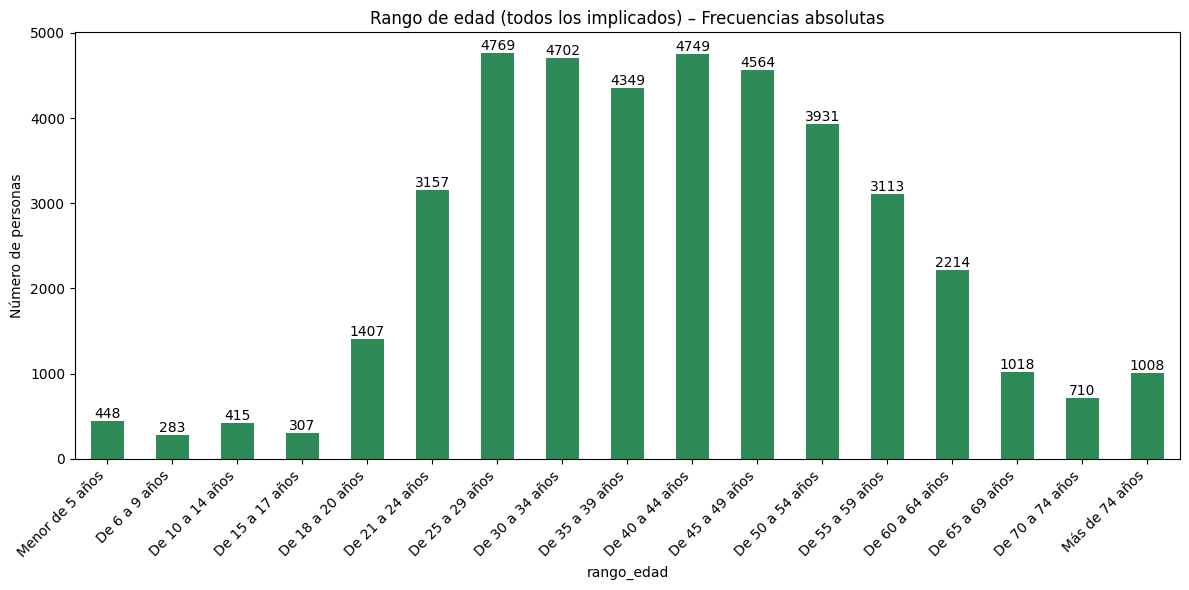

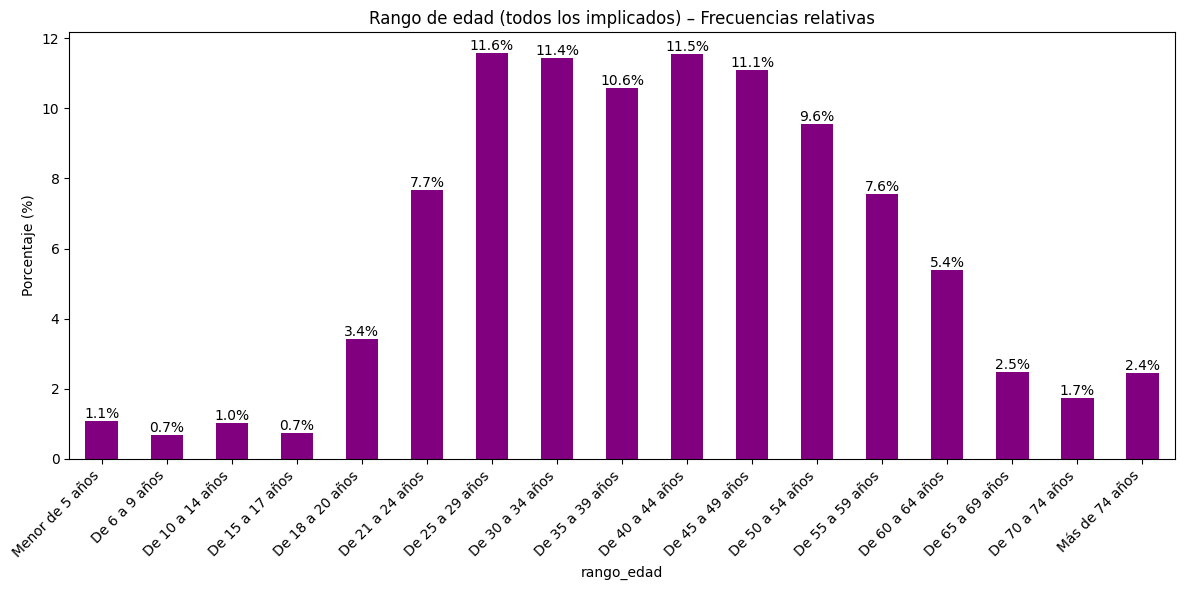

In [39]:
# 1. Dataset completo (todos los implicados) 
df_todos = df_2022.copy()

# 2. Eliminar categoría "Desconocido" 
df_todos = df_todos[
    df_todos["rango_edad"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto de rangos de edad 
orden_edad = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años",
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]

df_todos["rango_edad"] = df_todos["rango_edad"].str.strip()
df_todos["rango_edad"] = df_todos["rango_edad"].astype("category")
df_todos["rango_edad"] = df_todos["rango_edad"].cat.set_categories(
    orden_edad, ordered=True
)

# 4. Frecuencias absolutas 
edad_abs_all = df_todos["rango_edad"].value_counts().sort_index()

# 5. Frecuencias relativas (%) 
edad_rel_all = edad_abs_all / edad_abs_all.sum() * 100

# 6. Gráfico de frecuencias absolutas 
plt.figure(figsize=(12, 6))
edad_abs_all.plot(kind="bar", color="seagreen")

plt.title("Rango de edad (todos los implicados) – Frecuencias absolutas")
plt.ylabel("Número de personas")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_abs_all):
    if v > 0:
        plt.text(i, v, f"{v}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

# 7. Gráfico de frecuencias relativas 
plt.figure(figsize=(12, 6))
edad_rel_all.plot(kind="bar", color="purple")

plt.title("Rango de edad (todos los implicados) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(edad_rel_all):
    if v > 0:
        plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

Ahora vamos a analizar la distribución por sexo:

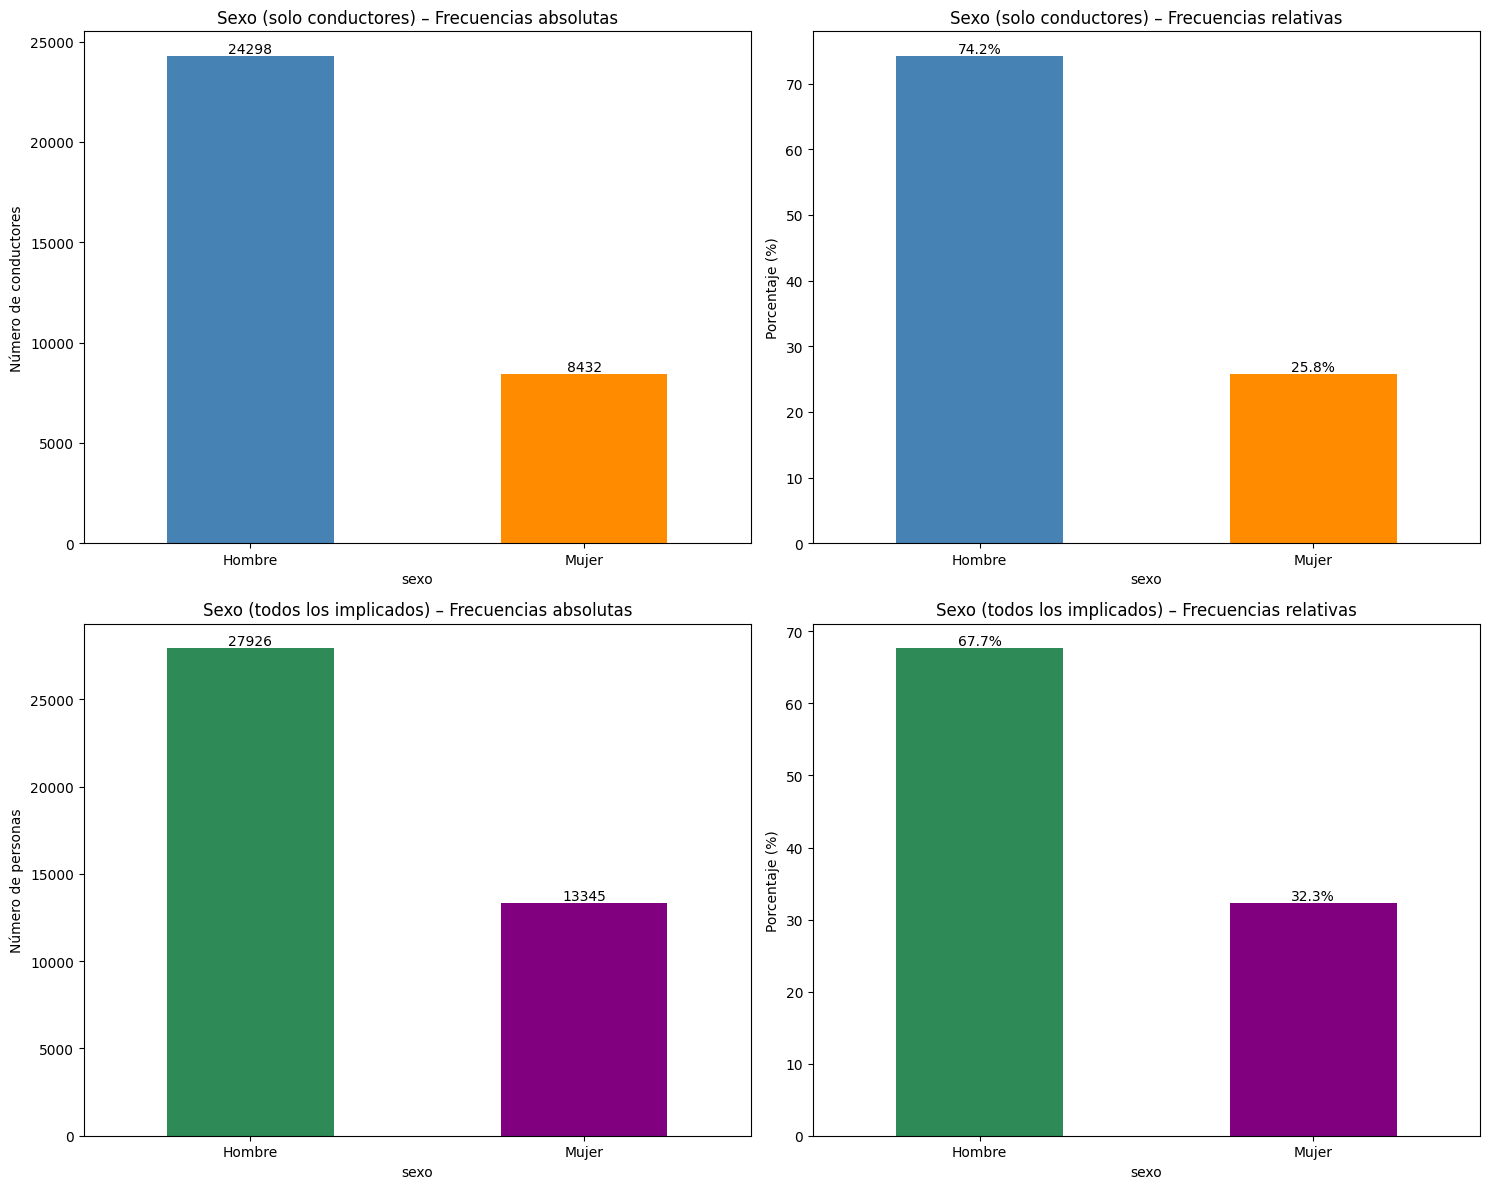

In [40]:
# Filtrar solo conductores 
df_conductores = df_2022[
    df_2022["tipo_persona"].str.strip().str.lower() == "conductor"
]

# Eliminar "Desconocido"
df_conductores = df_conductores[
    df_conductores["sexo"].str.strip().str.lower() != "desconocido"
]

# Orden correcto 
orden_sexo = ["Hombre", "Mujer"]

df_conductores["sexo"] = df_conductores["sexo"].str.strip()
df_conductores["sexo"] = df_conductores["sexo"].astype("category")
df_conductores["sexo"] = df_conductores["sexo"].cat.set_categories(
    orden_sexo, ordered=True
)

# Frecuencias 
sexo_abs = df_conductores["sexo"].value_counts().sort_index()
sexo_rel = sexo_abs / sexo_abs.sum() * 100

# Crear figura
plt.figure(figsize= (15, 12))

# Gráfico de frecuencias absolutas (solo conductores)
plt.subplot(2, 2, 1)
sexo_abs.plot(kind="bar", color=["steelblue", "darkorange"])

plt.title("Sexo (solo conductores) – Frecuencias absolutas")
plt.ylabel("Número de conductores")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_abs):
    plt.text(i, v, f"{v}", ha="center", va="bottom")

# Gráfico de frecuencias relativas (solo conductores)
plt.subplot(2, 2, 2)
sexo_rel.plot(kind="bar", color=["steelblue", "darkorange"])

plt.title("Sexo (solo conductores) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_rel):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

# Dataset completo 
df_todos = df_2022.copy()

# Eliminar "Desconocido" 
df_todos = df_todos[
    df_todos["sexo"].str.strip().str.lower() != "desconocido"
]

# 3. Orden correcto 
df_todos["sexo"] = df_todos["sexo"].str.strip()
df_todos["sexo"] = df_todos["sexo"].astype("category")
df_todos["sexo"] = df_todos["sexo"].cat.set_categories(
    orden_sexo, ordered=True
)

# Frecuencias 
sexo_abs_all = df_todos["sexo"].value_counts().sort_index()
sexo_rel_all = sexo_abs_all / sexo_abs_all.sum() * 100

# Gráfico de frecuencias absolutas (todos)
plt.subplot(2, 2, 3)
sexo_abs_all.plot(kind="bar", color=["seagreen", "purple"])

plt.title("Sexo (todos los implicados) – Frecuencias absolutas")
plt.ylabel("Número de personas")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_abs_all):
    plt.text(i, v, f"{v}", ha="center", va="bottom")

# Gráfico de frecuencias relativas (todos)
plt.subplot(2, 2, 4)
sexo_rel_all.plot(kind="bar", color=["seagreen", "purple"])

plt.title("Sexo (todos los implicados) – Frecuencias relativas")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=0)

for i, v in enumerate(sexo_rel_all):
    plt.text(i, v, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

Mismo análisis que en 2023.

### Análisis de lesividad

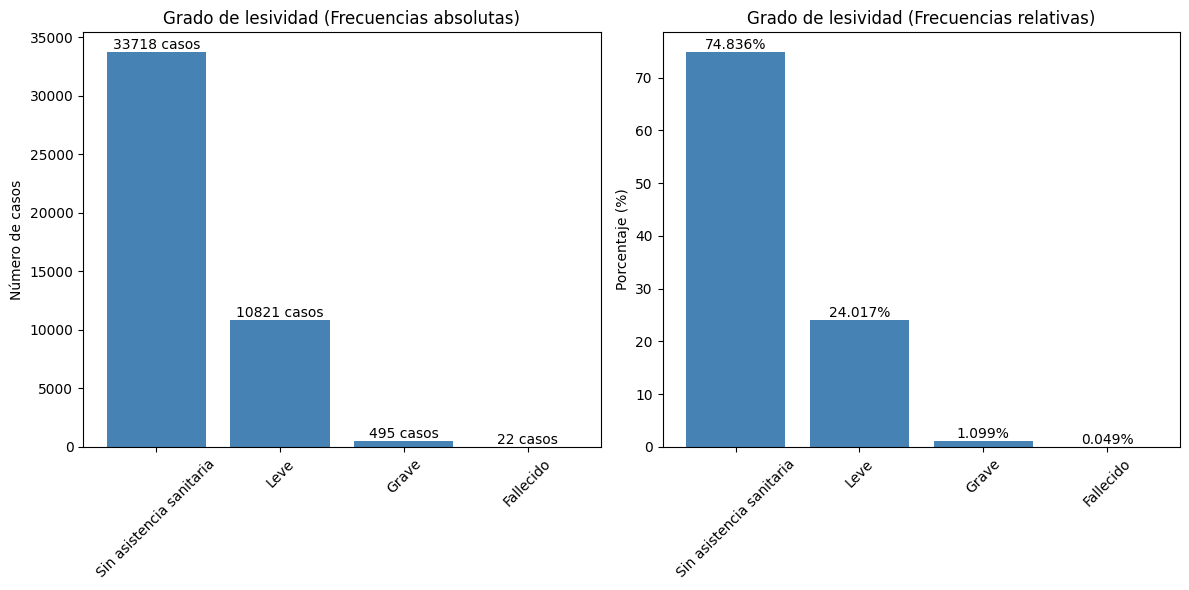

In [41]:
import re

# Función de limpieza profunda 
def limpiar_texto(x):
    x = str(x)
    x = unicodedata.normalize("NFKC", x)       # normaliza caracteres raros
    x = x.replace("\u00A0", " ")               # elimina NO-BREAK SPACE
    x = re.sub(r"\s+", " ", x)                 # colapsa espacios múltiples
    return x.strip().lower()

# Normalizar columna 
lesividad_norm = df_2022["grado_lesividad"].apply(limpiar_texto)

# Excluir variantes de "no consta" y "se desconoce" 
valores_excluir = ["no consta", "se desconoce"]
lesividad_filtrado = lesividad_norm[~lesividad_norm.isin(valores_excluir)]

# Recontar sobre columna limpia 
abs_freq = lesividad_filtrado.value_counts()
rel_freq = abs_freq / abs_freq.sum() * 100

# Eliminar categorías con frecuencia 0 
abs_freq = abs_freq[abs_freq > 0]
rel_freq = rel_freq[rel_freq > 0]

# Mapear nombres legibles 
etiquetas_legibles = {
    "sin asistencia sanitaria": "Sin asistencia sanitaria",
    "leve": "Leve",
    "grave": "Grave",
    "fallecido": "Fallecido"
}

abs_freq.index = [etiquetas_legibles.get(cat, cat.title()) for cat in abs_freq.index]
rel_freq.index = abs_freq.index  # sincronizar índices

# Crear figura 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
color = "steelblue"

# Gráfico 1: Absolutas 
axes[0].bar(abs_freq.index, abs_freq.values, color=color)
axes[0].set_title("Grado de lesividad (Frecuencias absolutas)")
axes[0].set_ylabel("Número de casos")
axes[0].tick_params(axis="x", rotation=45)

for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v} casos", ha="center", va="bottom", fontsize=10)

# Gráfico 2: Relativas 
axes[1].bar(rel_freq.index, rel_freq.values, color=color)
axes[1].set_title("Grado de lesividad (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis="x", rotation=45)

for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.3f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

- Casi tres cuartas partes no necesitaron asistencia sanitaria.
- Un 24% sí recibió asistencia médica, sin ingreso o con ingreso, pero inferior o igual a 24 horas.
- Los de grado de lesividad grave o fallecidos representan poco más del 1%, pero importante de analizar en el bivariante.

### Análisis univariante de alcohol

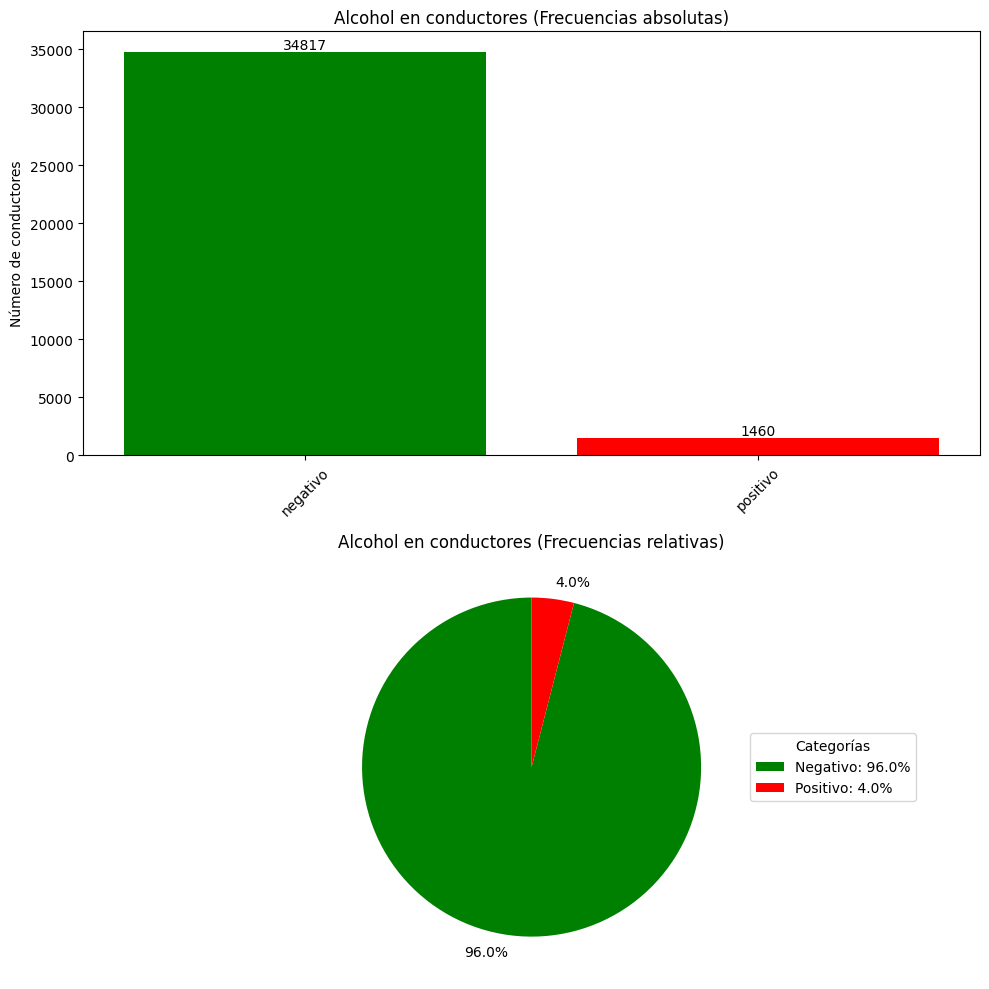

In [42]:
# Filtrar solo conductores 
df_conductores = df_2022[
    df_2022["tipo_persona"].str.lower() == "conductor"
]

# Normalizar columna antes de contar 
alcohol_col = (
    df_conductores["positiva_alcohol"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Excluir "no consta" 
alcohol_filtrado = alcohol_col[alcohol_col != "no consta"]

# Recontar sobre columna ya limpia 
abs_freq = alcohol_filtrado.value_counts()
rel_freq = abs_freq / abs_freq.sum() * 100

#Paleta de colores personalizada
color_map = {
    "positivo": "red",
    "negativo": "green",
}

colors = [color_map.get(cat, "white") for cat in abs_freq.index]

# Crear figura 
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

#1. Gráfico de barras (absolutos)
ax[0].bar(abs_freq.index, abs_freq.values, color=colors)
ax[0].set_title("Alcohol en conductores (Frecuencias absolutas)")
ax[0].set_ylabel("Número de conductores")
ax[0].tick_params(axis="x", rotation=45)

for i, v in enumerate(abs_freq):
    ax[0].text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

#2. Gráfico de tarta (porcentajes bien posicionados)
# Pie chart sin etiquetas internas
wedges, _ = ax[1].pie(
    rel_freq,
    labels=None,
    autopct=None,
    startangle=90,
    colors=colors,
    radius=1
)

ax[1].set_title("Alcohol en conductores (Frecuencias relativas)")

# Añadir etiquetas externas alineadas con cada segmento
for i, (wedge, pct) in enumerate(zip(wedges, rel_freq.values)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    label_x = 1.1 * x
    label_y = 1.1 * y
    ha = "left" if x > 0 else "right"
    ax[1].text(label_x, label_y, f"{pct:.1f}%", ha=ha, va="center", fontsize=10)

# Leyenda con nombre + porcentaje
legend_labels = [f"{cat.capitalize()}: {pct:.1f}%" for cat, pct in zip(rel_freq.index, rel_freq.values)]

ax[1].legend(
    wedges,
    legend_labels,
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

Un 96% de los conductores han dado negativo en alcohol. A simple vista puede parecer que el alcohol no influye, pero lo veremos en el análisis bivariante...

### Análisis univariante del estado meteorológico

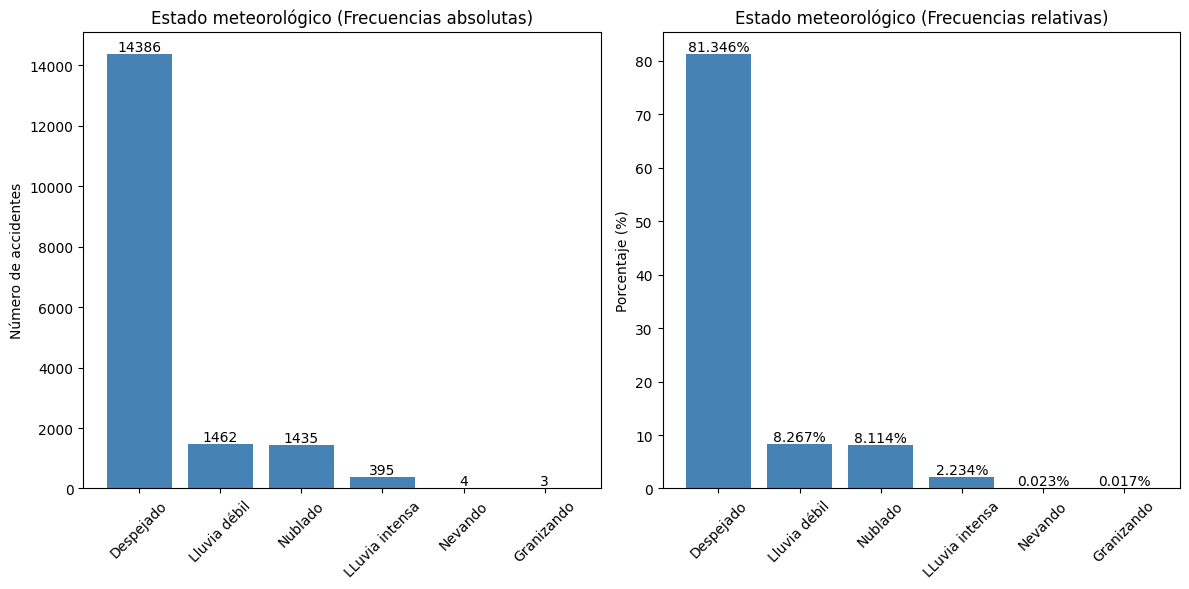

In [43]:
#  Normalizar columna para filtrar 
# Creamos una columna auxiliar normalizada para filtrar correctamente
df_2022["estado_meteorológico_normalizado"] = (
    df_2022["estado_meteorológico"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Filtrar para visualización 
df_meteo = df_2022[
    df_2022["estado_meteorológico_normalizado"] != "se desconoce"
]

# Agrupar usando la columna original
# Esto conserva los nombres originales (con mayúsculas y acentos) en el gráfico
abs_freq = (
    df_meteo
    .groupby("estado_meteorológico", observed = False)["num_expediente"]
    .nunique()
    .sort_values(ascending=False)
)

# Eliminar categorías con frecuencia 0 
abs_freq = abs_freq[abs_freq > 0]
rel_freq = abs_freq / abs_freq.sum() * 100
rel_freq = rel_freq[rel_freq > 0]

# Crear figura con dos subplots 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
color = "steelblue"

# Gráfico 1: Absolutas 
axes[0].bar(abs_freq.index, abs_freq.values, color=color)
axes[0].set_title("Estado meteorológico (Frecuencias absolutas)")
axes[0].set_ylabel("Número de accidentes")
axes[0].tick_params(axis="x", rotation=45)
for i, v in enumerate(abs_freq):
    axes[0].text(i, v, f"{v}", ha="center", va="bottom", fontsize=10)

# Gráfico 2: Relativas 
axes[1].bar(rel_freq.index, rel_freq.values, color=color)
axes[1].set_title("Estado meteorológico (Frecuencias relativas)")
axes[1].set_ylabel("Porcentaje (%)")
axes[1].tick_params(axis="x", rotation=45)
for i, v in enumerate(rel_freq):
    axes[1].text(i, v, f"{v:.3f}%", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

# Análisis bivariante

### Análisis bivariante Geográfico: Distribución de los tipos de accidente por distrito

- ¿Cómo se distribuyen los tipos de accidente significativos en cada distrito?

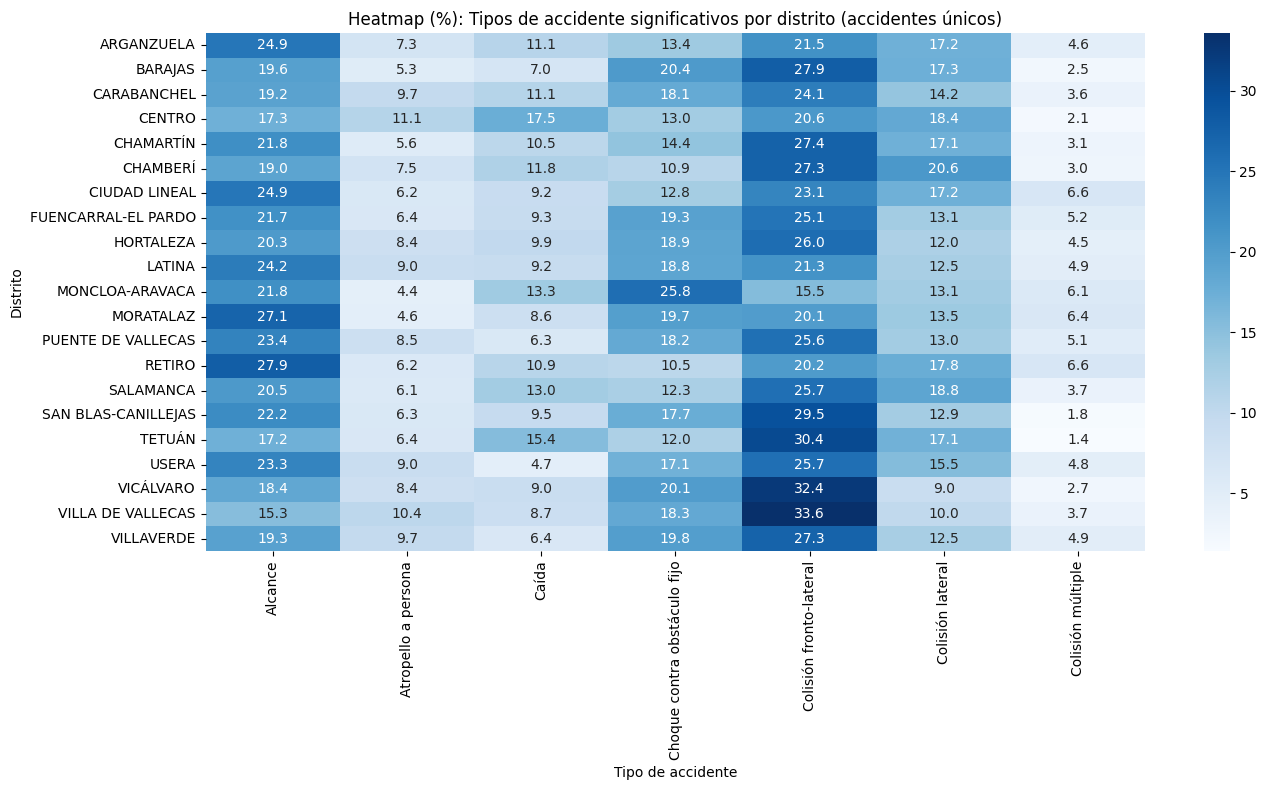

In [44]:
# 1. Definir los tipos de accidente significativos
tipos_significativos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

# 2. Filtrar el DataFrame original
df_filtrado = df_2022[
    df_2022["tipo_accidente"].isin(tipos_significativos)
]

# 3. Tabla de contingencia con expedientes únicos
tabla_contingencia = pd.crosstab(
    df_filtrado["distrito"],
    df_filtrado["tipo_accidente"],
    values=df_filtrado["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 4. Convertir a porcentajes por fila (por distrito)
tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

# 5. Heatmap en porcentajes
plt.figure(figsize=(14,8))
sns.heatmap(tabla_porcentajes, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap (%): Tipos de accidente significativos por distrito (accidentes únicos)")
plt.xlabel("Tipo de accidente")
plt.ylabel("Distrito")
plt.tight_layout()
plt.show()

El heatmap muestra la proporción de cada tipo de accidente dentro de cada distrito, considerando solo expedientes únicos.

Recordatorio de frecuencias por tipo de accidente:
- Colisión fronto-lateral: 23.2%
- Alcance: 20.2% 
- Colisión lateral: 15.2%
- Choque contra obstáculo fijo: 14.4%

1. En casi todos los distritos predominan accidentes por alcance o colisiones fronto-lateral.
2. En los distritos menos céntricos, además de los top 3 accidentes, los choques contra obstáculos fijos están alrededor del 19%.
3. Casos destacables:
    - En Moncloa-Aravaca más de la cuarta parte de accidentes han sido choques contra obstáculos fijo.
    - En el Centro y en Tetuán hubo un porcentaje más alto de caídas que en el resto de distritos.

- ¿Hay relación estadística entre distrito y tipo de accidente?

In [45]:
# 6. Test chi-cuadrado (se hace sobre la tabla de frecuencias absolutas)
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 832.9830016272846
P-Value: 3.989510026345024e-107
Grados de Libertad: 120
Tabla de Frecuencias Esperadas:
 [[182.92827004  62.75021097  89.13839662 137.44219409 209.76371308
  130.42025316  35.55696203]
 [ 77.22679325  26.49124473  37.63154008  58.02394515  88.55590717
   55.05949367  15.01107595]
 [244.83913502  83.98760549 119.30669831 183.95859705 280.75685654
  174.56012658  47.59098101]
 [250.01635021  85.76355485 121.82948312 187.84847046 286.6935654
  178.25126582  48.59731013]
 [290.57120253  99.67515823 141.59129747 218.31914557 333.19778481
  207.16518987  56.48022152]
 [213.99156118  73.40590717 104.27510549 160.7814346  245.38396624
  152.56708861  41.59493671]
 [258.86075949  88.79746835 126.13924051 194.49367089 296.83544304
  184.55696203  50.3164557 ]
 [219.16877637  75.18185654 106.7978903  164.67130802 251.32067511
  156.25822785  42.60126582]
 [159.41508439  54.68444093  77.68074895 119.77568565 182.80116034
  113.65632911  30.98655063]
 [198.4599

Comos el test Chi-Cuadrado nos da un p-valor muy pequeño, (<< 0.05), podemos rechazar las hipótesis nula de que las variables sean independientes. Por tanto, hay una relación estadísticamente significativa.

### Análisis bivariante por tipo de Accidente: Distribución de tipos de accidente según resultado de alcohol en conductores

- Distribución

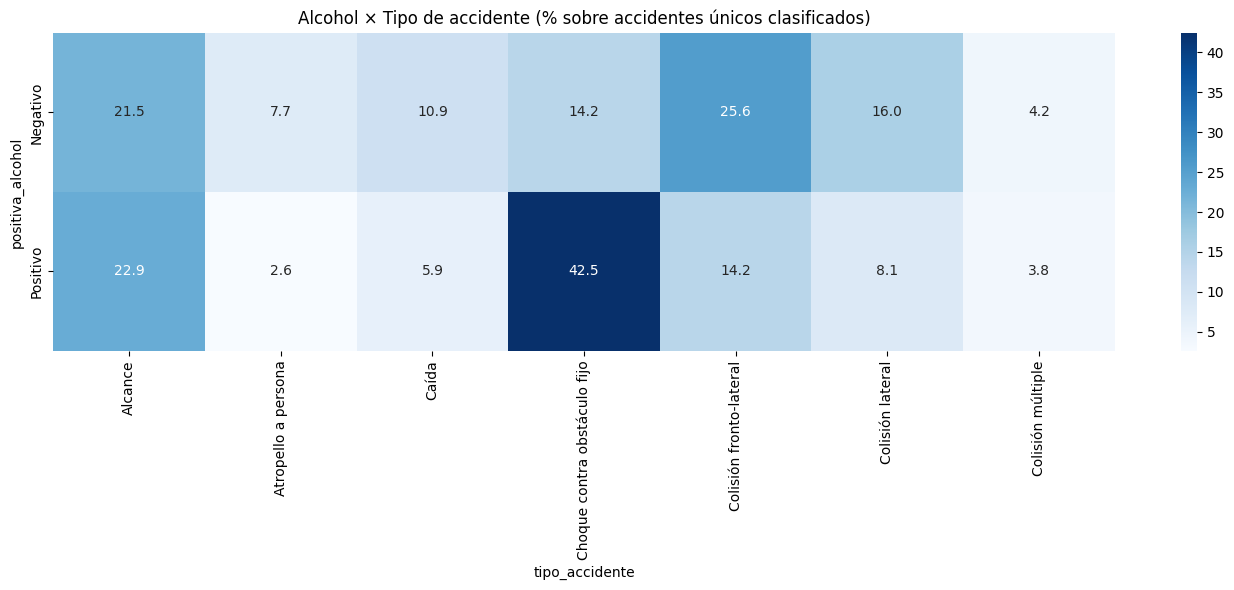

In [46]:
# 1. Filtrar solo conductores + tipos relevantes
df_conductores = df_2022[
    (df_2022["tipo_persona"].str.lower() == "conductor") &
    (df_2022["tipo_accidente"].isin(tipos_significativos))
]

# 2. Quitar "No consta" en alcohol
df_conductores = df_conductores[
    df_conductores["positiva_alcohol"] != "No consta"
]

# 4. Clasificar accidentes:
#    - Si algún conductor dio "Positivo" → "Positivo"
#    - Si todos dieron "Negativo" → "Negativo"
clasificacion_accidentes = (
    df_conductores
    .groupby("num_expediente")["positiva_alcohol"]
    .apply(lambda x: "Positivo" if x.str.lower().str.contains("pos", na=False).any() else "Negativo")
    .reset_index()
)

# 5. Añadir tipo de accidente (único por expediente)
tipos_por_accidente = (
    df_conductores.groupby("num_expediente")["tipo_accidente"]
    .first()
    .reset_index()
)

# 6. Unir clasificación + tipo de accidente
df_accidentes_clasificados = clasificacion_accidentes.merge(
    tipos_por_accidente, on="num_expediente"
)

# 7. Tabla de contingencia (accidentes únicos)
ct = pd.crosstab(
    df_accidentes_clasificados["positiva_alcohol"],
    df_accidentes_clasificados["tipo_accidente"]
)

# 8. Convertir a porcentajes por fila
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# 9. Heatmap de porcentajes
plt.figure(figsize=(14,6))
sns.heatmap(ct_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Alcohol × Tipo de accidente (% sobre accidentes únicos clasificados)")
plt.tight_layout()
plt.show()

Dentro de los positivos, más del 40% de accidentes es por choques contra obstáculos fijos (14.4% de tipos de accidentes). Recordemos el caso de Moncloa-Aravaca con más de la cuarta parte con este tipo de accidentes.

In [47]:
df_conductores[df_conductores.distrito == "MONCLOA-ARAVACA"]["positiva_alcohol"].value_counts(normalize= True)*100

positiva_alcohol
Negativo    96.560847
Positivo     3.439153
Name: proportion, dtype: float64

In [48]:
df_conductores[(df_conductores.distrito == "MONCLOA-ARAVACA") & (df_conductores.tipo_accidente == "Choque contra obstáculo fijo")] \
["positiva_alcohol"].value_counts(normalize= True)*100

positiva_alcohol
Negativo    89.325843
Positivo    10.674157
Name: proportion, dtype: float64

De los accidentes de choque contra obstáculo fijo en Moncloa-Aravaca, el 10% han dado positivo. Esto explica el alto porcentaje visto en el heatmap.

- ¿Hay relación estadística entre el consumo de alcohol y el tipo de accidente?

In [49]:
# 10. Test Chi-cuadrado (con tabla absoluta)
chi2, p, dof, expected = chi2_contingency(ct)

print("Chi-cuadrado:", chi2)
print("p-value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Chi-cuadrado: 808.8167652745751
p-value: 1.9161481344180334e-171
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[3799.29292395 1281.91301591 1851.34249326 2841.57385193 4356.64640913
  2708.73793796  738.49336786]
 [ 290.70707605   98.08698409  141.65750674  217.42614807  333.35359087
   207.26206204   56.50663214]]


Podemos decir con cierta confianza que existe una relación estadísticamente significativa entre ambas variables.

### Análisis Bivariante de alcohol: Positividad en alcohol según rango de edad

- ¿Cómo se distribuyen los accidentes con alcohol positivo y negativo según el rango de edad del conductor?

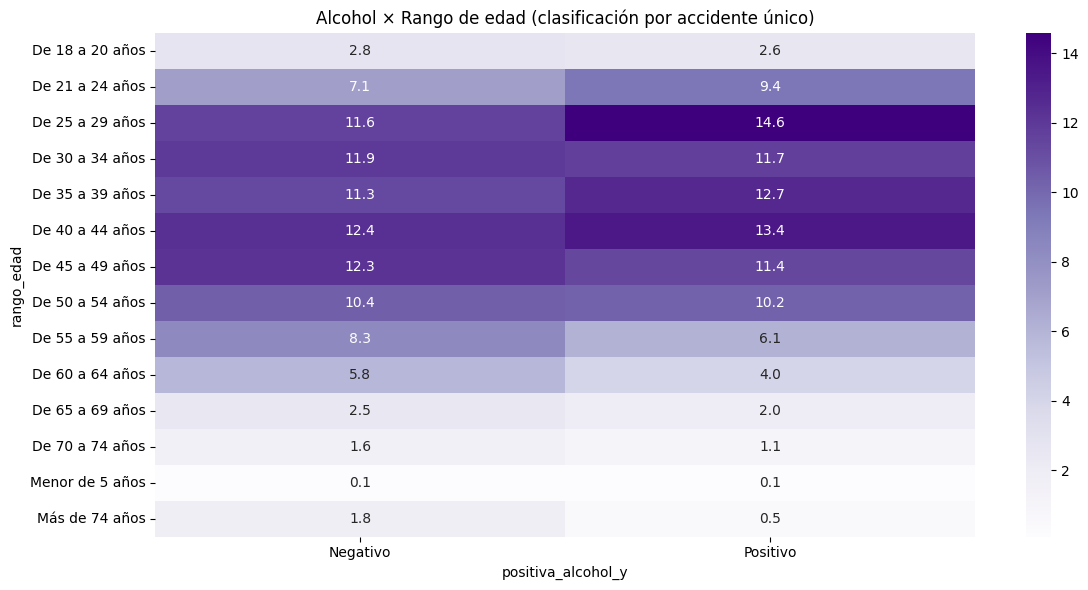

In [50]:
# 1. Filtrar solo conductores
df_conductores = df_2022[
    df_2022["tipo_persona"].str.lower() == "conductor"
].copy()

# 2. Eliminar menores de edad
rangos_menores = ["De 6 a 9 años", "De 10 a 14 años", "De 15 a 17 años"]
df_conductores = df_conductores[~df_conductores["rango_edad"].isin(rangos_menores)]

# 3. Eliminar alcohol = "No consta"
df_conductores = df_conductores[df_conductores["positiva_alcohol"] != "No consta"]

# 4. Eliminar rango_edad desconocido
df_conductores = df_conductores[df_conductores["rango_edad"] != "Desconocido"]

# 5. Clasificar accidentes según alcohol
# Si algún conductor del accidente dio positivo → accidente positivo
clasificacion_accidente = (
    df_conductores.groupby("num_expediente")["positiva_alcohol"]
    .apply(lambda x: "Positivo" if (x == "Positivo").any() else "Negativo")
    .reset_index()
)

# 6. Añadir la clasificación al dataframe de conductores
df_conductores = df_conductores.merge(clasificacion_accidente, on="num_expediente")

# 7. Tabla de contingencia: Rango de edad × Alcohol (por accidente único)
tabla_edad_alcohol = pd.crosstab(
    df_conductores["rango_edad"],
    df_conductores["positiva_alcohol_y"],  # columna creada por el merge
    values=df_conductores["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 8. Normalizar por columna (cada columna = 100%)
tabla_edad_alcohol_pct = tabla_edad_alcohol.div(
    tabla_edad_alcohol.sum(axis=0), axis=1
) * 100

# 9. Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(tabla_edad_alcohol_pct, annot=True, fmt=".1f", cmap="Purples")
plt.title("Alcohol × Rango de edad (clasificación por accidente único)")
plt.tight_layout()
plt.show()

En este caso, dentro de los accidentes con positivos en alcohol predominan los de entre 25 y 54 años, sobre todo hasta los 44 años (jóvenes y adultos).

- ¿Existe una relación estadísticamente significativa entre el rango de edad y el alcohol en accidentes?

In [51]:
# 10. Chi-cuadrado sobre tabla absoluta
chi2, p, dof, expected = chi2_contingency(tabla_edad_alcohol)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 80.88854119383609
P-Value: 7.506139899256707e-12
Grados de Libertad: 13
Frecuencias Esperadas:
 [[8.07775647e+02 5.72243528e+01]
 [2.13196740e+03 1.51032598e+02]
 [3.44682071e+03 2.44179291e+02]
 [3.48510834e+03 2.46891659e+02]
 [3.33289166e+03 2.36108341e+02]
 [3.65133269e+03 2.58667306e+02]
 [3.56541898e+03 2.52581016e+02]
 [3.02752445e+03 2.14475551e+02]
 [2.39157622e+03 1.69423778e+02]
 [1.67158198e+03 1.18418025e+02]
 [7.14391179e+02 5.06088207e+01]
 [4.51980825e+02 3.20191755e+01]
 [2.98830297e+01 2.11697028e+00]
 [5.11746884e+02 3.62531160e+01]]


p-valor muy pequeño --> hay relación

### Análisis bivariante entre el tipo de persona y el grado lesividad
- Distribución del grado de lesividad de las personas

Tabla absoluta:


grado_lesividad  Fallecido  Grave  Leve  Sin asistencia sanitaria
tipo_persona                                                     
Conductor               13    300  7650                     28535
Pasajero                 0     44  1955                      4931
Peatón                   9    151  1216                       252

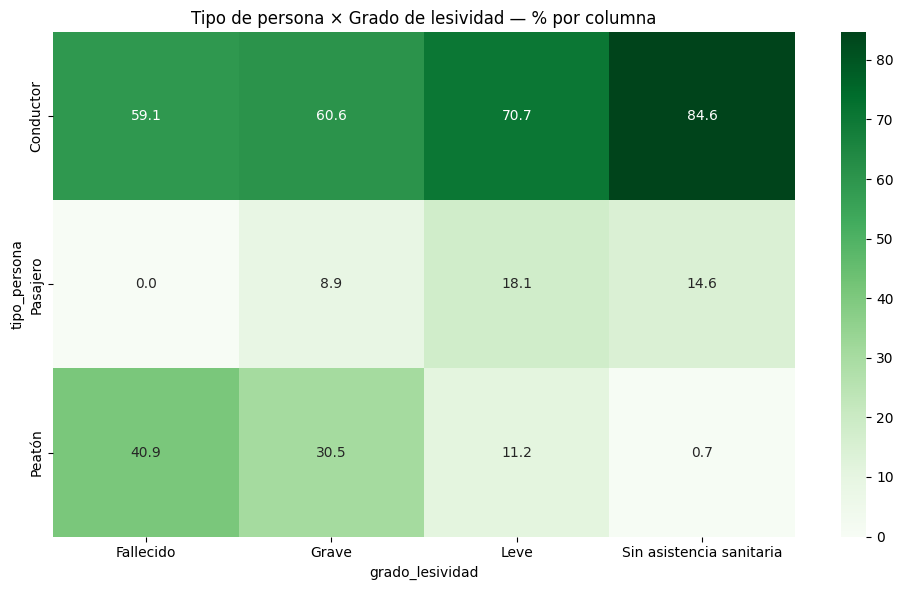

In [52]:
df = df_2022.copy()

# Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# Tabla absoluta (PERSONAS)
tabla_abs = pd.crosstab(
    df["tipo_persona"],
    df["grado_lesividad"]
)

print("Tabla absoluta:")
display(tabla_abs)

# Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Greens")
plt.title("Tipo de persona × Grado de lesividad — % por columna")
plt.tight_layout()
plt.show()

- Los conductores concentran la mayoría de lesiones en todas las categorías, especialmente en las leves y sin asistencia sanitaria.
- Los pasajeros tienen mayoría de lesiones leves.
- La mayoría de los peatones, los más vulnerables, o han fallecido o han estado graves (ingreso superior a 24 horas). Además, de las personas que no han necesitado asistencia médica, no representan ni el 1%.

- ¿Existe relación estadística entre el tipo de persona y el grado de lesividad?

In [53]:
# Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


--- Chi-cuadrado ---
Chi2: 3886.228979976786
p-value: 0.0
Grados de libertad: 6
Frecuencias esperadas:
 [[1.78212891e+01 4.00979004e+02 8.76564404e+03 2.73135557e+04]
 [3.38378906e+00 7.61352539e+01 1.66436279e+03 5.18611816e+03]
 [7.94921875e-01 1.78857422e+01 3.90993164e+02 1.21832617e+03]]


Sale un valor de frecuencia esperada < 1. Así que La categoría “Fallecido” la excluimos del análisis bivariante porque su frecuencia es extremadamente baja, lo que puede generar múltiples celdas con frecuencias esperadas inferiores a 5 en el test chi‑cuadrado.

Tabla absoluta:
grado_lesividad  Grave  Leve  Sin asistencia sanitaria
tipo_persona                                          
Conductor          300  7650                     28535
Pasajero            44  1955                      4931
Peatón             151  1216                       252

Tabla en porcentaje (% por columna):
grado_lesividad  Grave  Leve  Sin asistencia sanitaria
tipo_persona                                          
Conductor         60.6  70.7                      84.6
Pasajero           8.9  18.1                      14.6
Peatón            30.5  11.2                       0.7


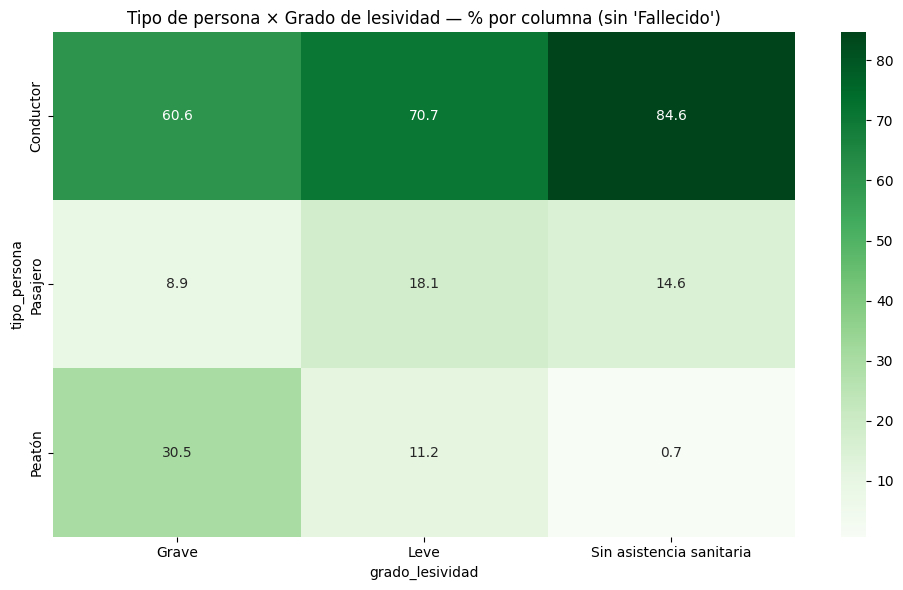


--- Chi-cuadrado ---
Chi2: 3814.4659088956537
p-value: 0.0
Grados de libertad: 4
Frecuencias esperadas:
 [[4.01031998e+02 8.76680253e+03 2.73171655e+04]
 [7.61724475e+01 1.66517587e+03 5.18865169e+03]
 [1.77955545e+01 3.89021606e+02 1.21218284e+03]]


In [54]:
# Copia del dataframe
df = df_2022.copy()

# 1. Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# 2. Eliminar fallecidos
df = df[df["grado_lesividad"] != "Fallecido"]

# 3. Tabla absoluta (PERSONAS)
tabla_abs = pd.crosstab(
    df["tipo_persona"],
    df["grado_lesividad"]
)

print("Tabla absoluta:")
print(tabla_abs)

# 4. Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100
print("\nTabla en porcentaje (% por columna):")
print(tabla_pct.round(1))

# 5. Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Greens")
plt.title("Tipo de persona × Grado de lesividad — % por columna (sin 'Fallecido')")
plt.tight_layout()
plt.show()

# 6. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


Sale un p-valor << 0.0001, así que hay relación estadísticamente significativa. 

### Análisis bivariante de rango de edad por lesividad
- ¿Cómo se distribuye el grado de lesividad según el rango de edad de las personas implicadas?

Tabla absoluta:


grado_lesividad  Fallecido  Grave  Leve  Sin asistencia sanitaria
rango_edad                                                       
De 18 a 20 años          1     12   421                       973
De 21 a 24 años          1     40   919                      2197
De 25 a 29 años          3     51  1539                      3175
De 30 a 34 años          1     54  1448                      3199
De 35 a 39 años          4     45  1159                      3140
De 40 a 44 años          2     48  1113                      3586
De 45 a 49 años          0     41  1001                      3522
De 50 a 54 años          0     40   825                      3066
De 55 a 59 años          1     38   668                      2406
De 60 a 64 años          0     27   436                      1751
De 65 a 69 años          0     21   212                       785
De 70 a 74 años          3     19   170                       518
Más de 74 años           5     40   331                       632

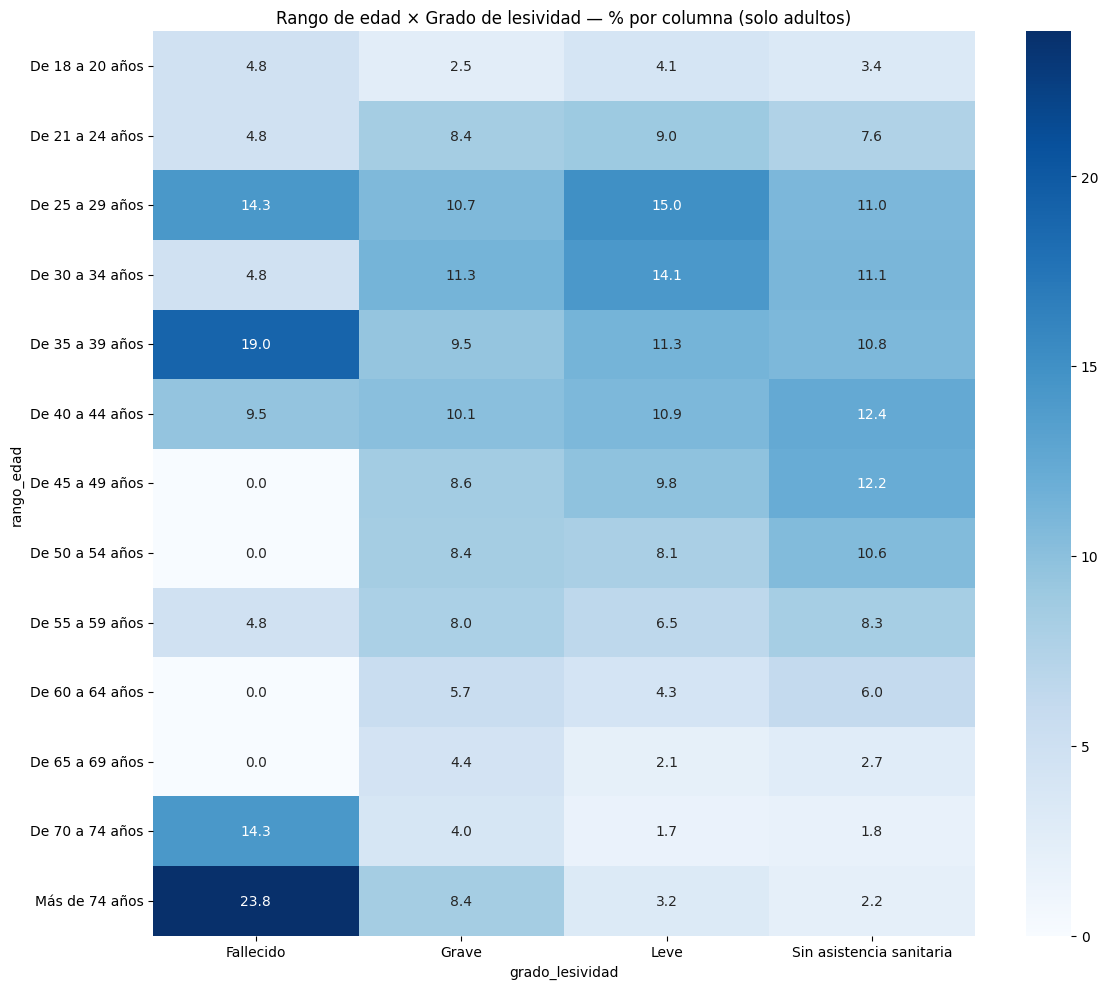

In [55]:
# Copia del dataframe
df = df_2022.copy()

# 1. Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# 2. Eliminar edades desconocidas
df = df[df["rango_edad"] != "Desconocido"]

# 3. Eliminar menores de 18 años
rangos_menores = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años"
]
df = df[~df["rango_edad"].isin(rangos_menores)]

# 4. Orden correcto de los rangos de edad (solo adultos)
orden_edades_adultos = [
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]
df["rango_edad"] = pd.Categorical(df["rango_edad"], categories=orden_edades_adultos, ordered=True)

# 5. Tabla absoluta
tabla_abs = pd.crosstab(df["rango_edad"], df["grado_lesividad"])
print("Tabla absoluta:")
display(tabla_abs)

# 6. Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 7. Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Rango de edad × Grado de lesividad — % por columna (solo adultos)")
plt.tight_layout()
plt.show()

- Los adultos de entre 25 y 54 años presentan la mayoría de las lesiones en todas las categorías, menos la de fallecidos. Especialmente, dentro de las lesiones leves y fallecidos, hay alta proporción de entre 25 y 39.
- Los mayores de 65, presentan porcentajes bajos en todas las categorías, menos los de más de 74 años que presentan porcentajes más altos en grave y mayores de 70 en fallecidos. 

¿Existe relación estadística?

De nuevo, quitamos la categoría de "Fallecido". 

Tabla absoluta:
grado_lesividad  Grave  Leve  Sin asistencia sanitaria
rango_edad                                            
De 18 a 20 años     12   421                       973
De 21 a 24 años     40   919                      2197
De 25 a 29 años     51  1539                      3175
De 30 a 34 años     54  1448                      3199
De 35 a 39 años     45  1159                      3140
De 40 a 44 años     48  1113                      3586
De 45 a 49 años     41  1001                      3522
De 50 a 54 años     40   825                      3066
De 55 a 59 años     38   668                      2406
De 60 a 64 años     27   436                      1751
De 65 a 69 años     21   212                       785
De 70 a 74 años     19   170                       518
Más de 74 años      40   331                       632


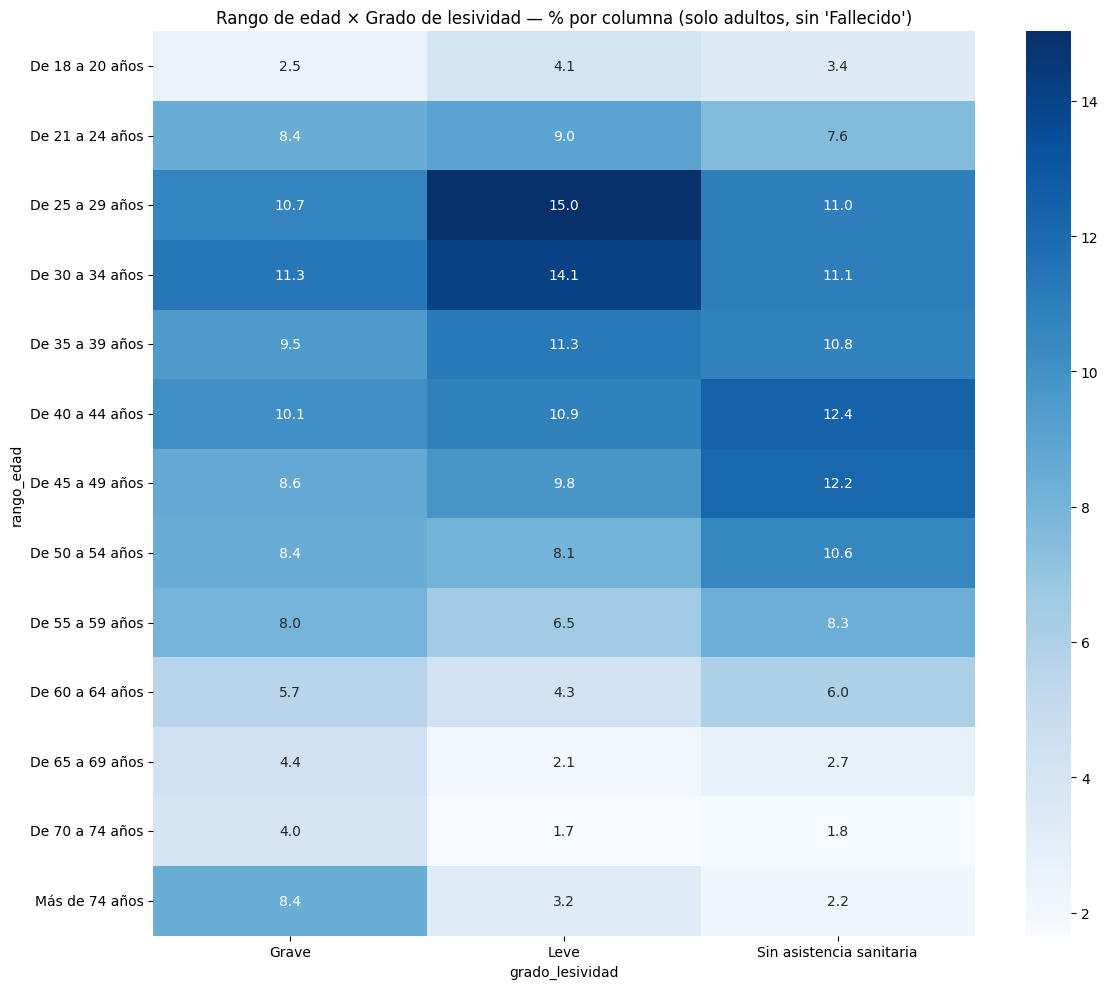

In [56]:
# Copia del dataframe
df = df_2022.copy()

# 1. Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# 2. Eliminar fallecidos
df = df[df["grado_lesividad"] != "Fallecido"]

# 3. Eliminar edades desconocidas
df = df[df["rango_edad"] != "Desconocido"]

# 4. Eliminar menores de 18 años
rangos_menores = [
    "Menor de 5 años",
    "De 6 a 9 años",
    "De 10 a 14 años",
    "De 15 a 17 años"
]
df = df[~df["rango_edad"].isin(rangos_menores)]

# 5. Orden correcto de los rangos de edad (solo adultos)
orden_edades_adultos = [
    "De 18 a 20 años",
    "De 21 a 24 años",
    "De 25 a 29 años",
    "De 30 a 34 años",
    "De 35 a 39 años",
    "De 40 a 44 años",
    "De 45 a 49 años",
    "De 50 a 54 años",
    "De 55 a 59 años",
    "De 60 a 64 años",
    "De 65 a 69 años",
    "De 70 a 74 años",
    "Más de 74 años"
]
df["rango_edad"] = pd.Categorical(df["rango_edad"], categories=orden_edades_adultos, ordered=True)

# 6. Tabla absoluta
tabla_abs = pd.crosstab(df["rango_edad"], df["grado_lesividad"])
print("Tabla absoluta:")
print(tabla_abs)

# 7. Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 8. Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Rango de edad × Grado de lesividad — % por columna (solo adultos, sin 'Fallecido')")
plt.tight_layout()
plt.show()

In [57]:
# 9. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)
print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


--- Chi-cuadrado ---
Chi2: 512.5138399990732
p-value: 4.19068661189854e-93
Grados de libertad: 24
Frecuencias esperadas:
 [[  16.87143289  363.01936069 1026.10920641]
 [  37.87072703  814.85711405 2303.27215892]
 [  57.17807805 1230.28965413 3477.53226782]
 [  56.41010386 1213.76530201 3430.82459413]
 [  52.12624786 1121.59040032 3170.28335182]
 [  56.96208531 1225.64218009 3464.3957346 ]
 [  54.76615912 1178.39286074 3330.84098014]
 [  47.17041444 1014.95669053 2868.87289503]
 [  37.34274478  803.49662196 2271.16063326]
 [  26.56710699  571.63930624 1615.79358677]
 [  12.21558939  262.84047595  742.94393466]
 [   8.48371483  182.54245235  515.97383281]
 [  12.03559544  258.96758092  731.99682364]]


Hay relación estadísticamente significativa.

### Análisis bivariante de tipo de accidente por grado de lesividad
- ¿Cómo se distribuye el tipo de accidente según el grado de lesividad?
- ¿Existe relación estadística entre ambas variables?

Tabla absoluta:


grado_lesividad               Fallecido  Grave  Leve  Sin asistencia sanitaria
tipo_accidente                                                                
Alcance                               1     42  2273                      8160
Atropello a persona                   9    151  1337                      1656
Caída                                 3     71  1817                       868
Choque contra obstáculo fijo          5     25   550                      4487
Colisión fronto-lateral               3    145  2887                      8573
Colisión lateral                      0     24   955                      5772
Colisión múltiple                     0      8   531                      2358

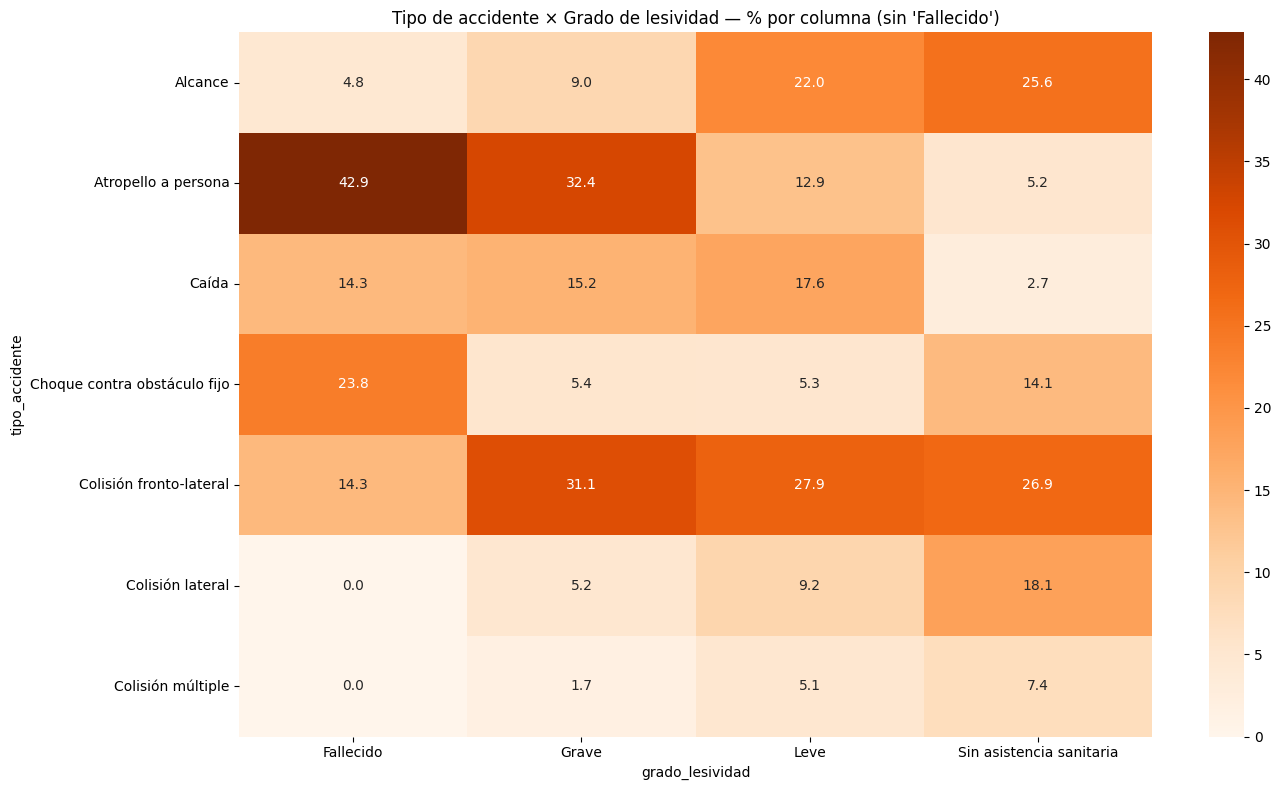


--- Chi-cuadrado ---
Chi2: 4915.521118231022
p-value: 0.0
Grados de libertad: 18
Frecuencias esperadas:
 [[5.15080424e+00 1.14298799e+02 2.53861066e+03 7.81793973e+03]
 [1.55025637e+00 3.44009272e+01 7.64054927e+02 2.35299389e+03]
 [1.35653579e+00 3.01021751e+01 6.68578352e+02 2.05896294e+03]
 [2.49132542e+00 5.52836974e+01 1.22786753e+03 3.78135745e+03]
 [5.70738217e+00 1.26649528e+02 2.81292407e+03 8.66271902e+03]
 [3.31930884e+00 7.36570439e+01 1.63594507e+03 5.03807857e+03]
 [1.42438716e+00 3.16078294e+01 7.02019386e+02 2.16194840e+03]]


In [58]:
# Copia del dataframe
df = df_2022.copy()

# 1. Eliminar registros sin lesividad válida
df = df[df["grado_lesividad"] != "Se desconoce"]

# 2. Mantener SOLO los 7 tipos de accidente seleccionados
tipos_validos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

df = df[df["tipo_accidente"].isin(tipos_validos)]

# 3. Ordenar categorías de lesividad (ya sin fallecido)
orden_lesividad = [
    "Fallecido",
    "Grave",
    "Leve",
    "Sin asistencia sanitaria"
]

df["grado_lesividad"] = pd.Categorical(df["grado_lesividad"],
                                       categories=orden_lesividad,
                                       ordered=True)

# 4. Tabla absoluta
tabla_abs = pd.crosstab(
    df["tipo_accidente"],
    df["grado_lesividad"]
)

print("Tabla absoluta:")
display(tabla_abs)

# 5. Tabla porcentual por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 6. Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(tabla_pct, annot=True, fmt=".1f", cmap="Oranges")
plt.title("Tipo de accidente × Grado de lesividad — % por columna (sin 'Fallecido')")
plt.tight_layout()
plt.show()

# 7. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)

In [59]:
# Compruebo si al menos el 80% de celdas tienen una frecuencia esperada mayor o igual que 5

df_expected = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

porcentaje = (df_expected >= 5).sum().sum() / df_expected.size * 100
print(porcentaje)

82.14285714285714


- El 42.9% de las personas atropelladas han fallecido, y un 32.4% han sido gravemente heridas. 
- En alcance casi 50% presentan grado de lesividad leve o no han necesitado asistencia sanitaria.
- Colisión fronto-lateral destaca por un porcentaje elevado en todas las categorías. 
- Caída tiene un valor muy pequeño de gente sin asistencia médica.
- Choque contra obstáculo fijo tiene alto porcentaje de fallecidos.

El test chi-cuadrado revela que hay relación estadística.

### Análisis bivariante de tipo de accidente por grado meteorológico
- ¿Cómo se distribuye los tipos de accidentes según el estado meteorológico?
- ¿Existe relación estadística entre ambas variables?

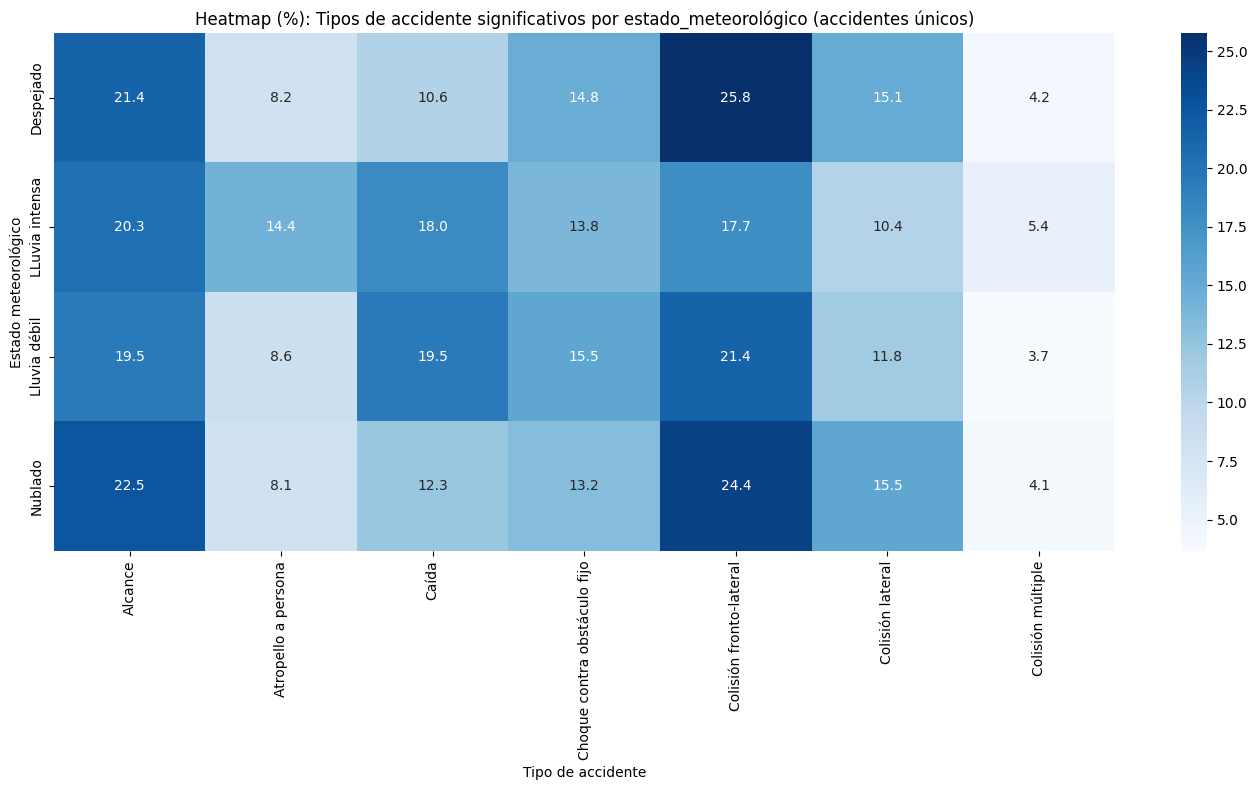

In [60]:
# 1. Definir los tipos de accidente significativos
tipos_significativos = [
    "Colisión fronto-lateral",
    "Alcance",
    "Colisión lateral",
    "Choque contra obstáculo fijo",
    "Caída",
    "Atropello a persona",
    "Colisión múltiple"
]

estados = ["Despejado", "Nublado", "Lluvia débil", "LLuvia intensa"]

# 2. Filtrar el DataFrame original
df_filtrado = df_2022[
    df_2022["tipo_accidente"].isin(tipos_significativos) &
    df_2022["estado_meteorológico"].isin(estados)
]

# 3. Tabla de contingencia con expedientes únicos
tabla_contingencia = pd.crosstab(
    df_filtrado["estado_meteorológico"],
    df_filtrado["tipo_accidente"],
    values=df_filtrado["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

# 4. Convertir a porcentajes por fila 
tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100

# 5. Heatmap en porcentajes
plt.figure(figsize=(14,8))
sns.heatmap(tabla_porcentajes, annot=True, fmt=".1f", cmap="Blues")
plt.title("Heatmap (%): Tipos de accidente significativos por estado_meteorológico (accidentes únicos)")
plt.xlabel("Tipo de accidente")
plt.ylabel("Estado meteorológico")
plt.tight_layout()
plt.show()

Como habíamos visto en el análisis univariante, en los cuatro estados meteorlógicos, los tipos de accidentes más presentes son por alcance y colisión fronto-lateral. 
- En los días nublados el porcentaje de alcance, caídas y colisiones laterales es mayor que en los días despejados.
- En las caídas, la mayor proporción se encuentra en días de lluvia débil e intensa, superando a los días despejados. 
- Los días de lluvia intensa, también superan en proporción a los días despejados en atropellos a personas y choques contra obstáculos. De hecho los tipos de accidentes están más o menos distribuidos en los días de lluvia intensa, menos colisiones laterales y múltiples, que tienen el menor porcentaje dentro de los estados.


In [61]:
# 6. Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("\n--- Chi-cuadrado ---")
print("Chi2:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


--- Chi-cuadrado ---
Chi2: 153.95456128241796
p-value: 1.2633424865267741e-23
Grados de libertad: 18
Frecuencias esperadas:
 [[2890.14671397 1127.2061211  1574.66538392 1997.67332091 3406.88473333
  1996.04323252  562.38049426]
 [  75.69178041   29.5210751    41.23985329   52.31826108   89.22494137
    52.27556972   14.72851903]
 [ 291.25344237  113.59377067  158.6863087   201.31477362  343.32752089
   201.15050207   56.67368168]
 [ 288.90806326  112.67903313  157.40845409  199.6936444   340.5628044
   199.53069569   56.21730503]]


Podemos rechazar la hipótesis nula de la independencia de variables (p-valor muy pequeño), por tanto, hay relación estadísticamente significativa.

### Análisis bivariante de alcohol: Distribución de la positividad en alcohol según el grado de lesividad
- ¿Cómo se distribuyen los conductores con alcohol positivo y negativo según el grado de lesividad?
- ¿Existe una relación estadísticamente significativa?

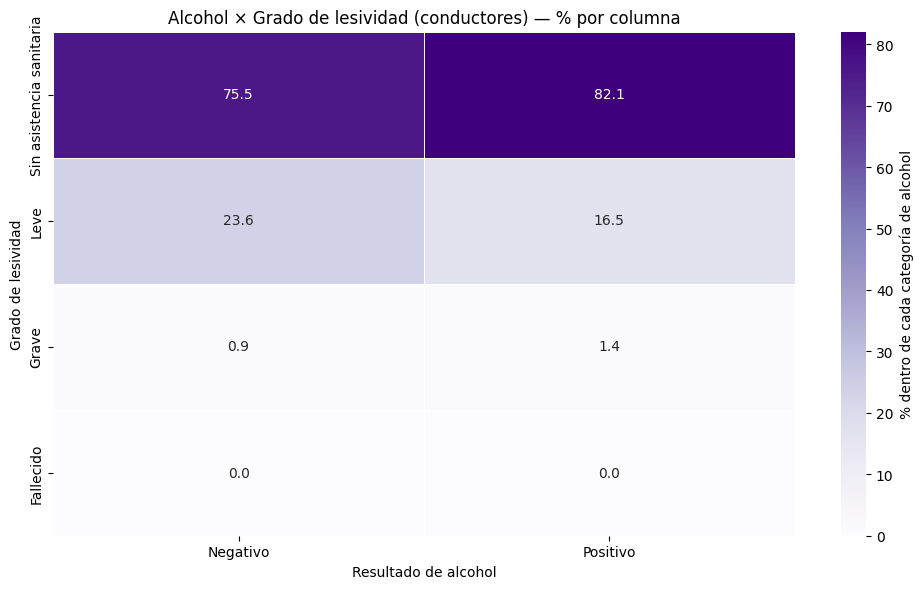

TEST CHI-CUADRADO
Valor Chi-Cuadrado: 43.59938012307095
P-Value: 1.8358368048189575e-09
Grados de Libertad: 3

Frecuencias Esperadas:

positiva_alcohol              Negativo     Positivo
grado_lesividad                                    
Sin asistencia sanitaria  23537.450115  1104.549885
Leve                       7218.265990   338.734010
Grave                       279.866605    13.133395
Fallecido                    12.417290     0.582710


In [62]:
# 1. Filtrar solo CONDUCTORES
df = df_2022.copy()
df = df[df["tipo_persona"].str.lower() == "conductor"]

# 2. Limpiar datos
rangos_menores = ["De 6 a 9 años", "De 10 a 14 años", "De 15 a 17 años"]
df = df[~df["rango_edad"].isin(rangos_menores)]
df = df[df["positiva_alcohol"] != "No consta"]
df = df[df["rango_edad"] != "Desconocido"]

# 3. Tabla absoluta: grado de lesividad × alcohol
tabla_abs = pd.crosstab(
    df["grado_lesividad"],
    df["positiva_alcohol"]
)

# 4. Tabla porcentual para heatmap
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

orden_grado = [
    "Sin asistencia sanitaria",
    "Leve",
    "Grave",
    "Fallecido"
]

tabla_abs = tabla_abs.reindex(orden_grado)
tabla_pct = tabla_pct.reindex(orden_grado)

# 5. Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Purples",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada categoría de alcohol"}
)

plt.title("Alcohol × Grado de lesividad (conductores) — % por columna")
plt.xlabel("Resultado de alcohol")
plt.ylabel("Grado de lesividad")
plt.tight_layout()
plt.show()

# 6. Test Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("TEST CHI-CUADRADO")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)

# Convertir esperadas a DataFrame con índices y columnas correctas
expected_df = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

print("\nFrecuencias Esperadas:\n")
print(expected_df)

- La mayoría de los conductores, tanto positivos como negativos, no requirieron asistencia sanitaria.
- Las lesiones leves son el segundo grupo más frecuente, más común en negativos.
- Las lesiones graves y los fallecimientos son muy poco frecuentes y prácticamente iguales en ambos grupos.

El p-valor no es menor que 0.05, por lo que con el test Chi-cuadrado no podemos afirmar que haya relación estadística y que las variables sean dependientes.

### Análisis bivariante de lesividad: Relación entre la hora del día y la gravedad de los accidentes
- ¿Cómo se distribuyen los ACCIDENTES según su gravedad en cada franja horaria?
- ¿Existe una relación estadísticamente significativa entre la franja horaria y la gravedad del ACCIDENTE?”

Tabla absoluta:


grado_lesividad  Fallecido  Grave    Leve  Sin asistencia sanitaria
franja                                                             
Madrugada              4.0   53.0   659.0                    1757.0
Mañana                 3.0  119.0  2181.0                    4139.0
Tarde                  5.0  146.0  3234.0                    6336.0
Noche                  9.0  150.0  2807.0                    5870.0

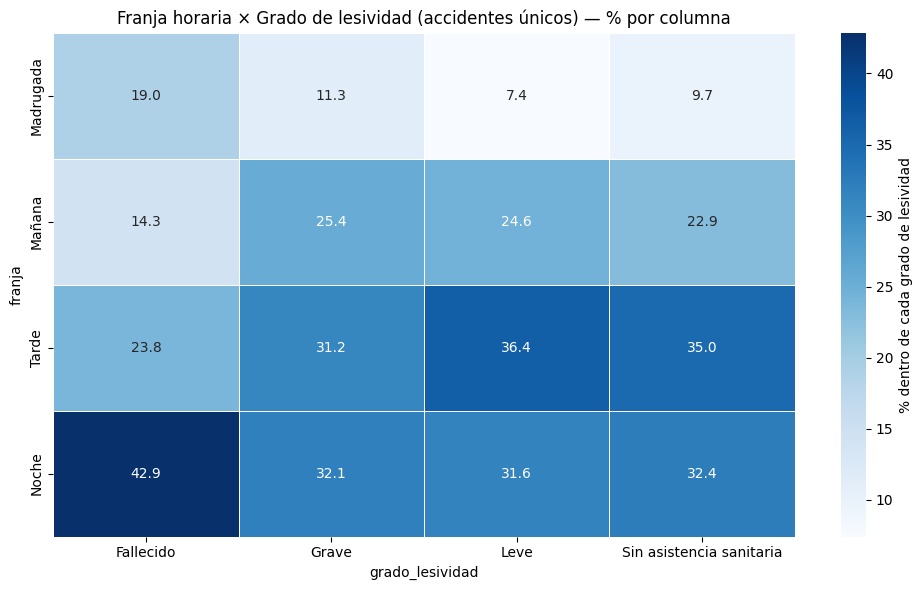


--- Resultados Chi-cuadrado ---
Valor Chi-Cuadrado: 57.15956577416603
P-Value: 4.710171750972703e-09
Grados de Libertad: 9

Frecuencias Esperadas:
 [[1.89039750e+00 4.21288585e+01 7.99458103e+02 1.62952264e+03]
 [4.92435935e+00 1.09742865e+02 2.08253502e+03 4.24479776e+03]
 [7.43087507e+00 1.65602359e+02 3.14255245e+03 6.40541431e+03]
 [6.75436808e+00 1.50525917e+02 2.85645443e+03 5.82226529e+03]]


In [63]:
# 1. Copia del dataset
df = df_2022.copy()

# 2. Crear columna hora desde fecha_hora (datetime) 
df["hora"] = df["fecha_hora"].dt.hour

# 3. Crear franja horaria 
df["franja"] = pd.cut(
    df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

# 4. Eliminar categoría "Se desconoce" en grado_lesividad 
df = df[df["grado_lesividad"] != "Se desconoce"]

# 5. Tabla absoluta: Franja × Grado de lesividad (accidentes únicos)
tabla_abs = pd.crosstab(
    df["franja"],
    df["grado_lesividad"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla absoluta:")
display(tabla_abs)

# 6. Convertir a porcentajes por columna (cada columna suma 100%)
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 7. Heatmap en porcentaje
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Blues",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada grado de lesividad"}
)

plt.title("Franja horaria × Grado de lesividad (accidentes únicos) — % por columna")
plt.tight_layout()
plt.show()

# 8. Test Chi-cuadrado (siempre con tabla absoluta)
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("\nFrecuencias Esperadas:\n", expected)

In [64]:
# Compruebo si al menos el 80% de celdas tienen una frecuencia esperada mayor o igual que 5

df_expected = pd.DataFrame(
    expected,
    index=tabla_abs.index,
    columns=tabla_abs.columns
)

porcentaje = (df_expected >= 5).sum().sum() / df_expected.size * 100
print(porcentaje)

87.5


- Los accidentes de madrugada son los que menos proporción tienen en todas las categorías de lesividad, salvo en fallecidos, que tiene un porcentaje superior. El resto de franjas horarias tienen porcentajes elevados.
- En fallecidos, destacan principalmente los accidentes de noche, y en leve y asistencia sanitaria, los de tarde.

p-valor << 0.001 --> Existe relación.

### Análisis bivariante lesividad: Positividad en alcohol por franja horaria
- ¿Cómo se distribuyen los ACCIDENTES con alcohol positivo y negativo según la franja horaria?
- ¿Existe una asociación estadísticamente significativa entre la franja horaria y el resultado de alcohol del accidente

Tabla absoluta:


alcohol_accidente  Negativo  Positivo
franja                               
Madrugada              1464       547
Mañana                 4362       270
Tarde                  6853       140
Noche                  6039       493

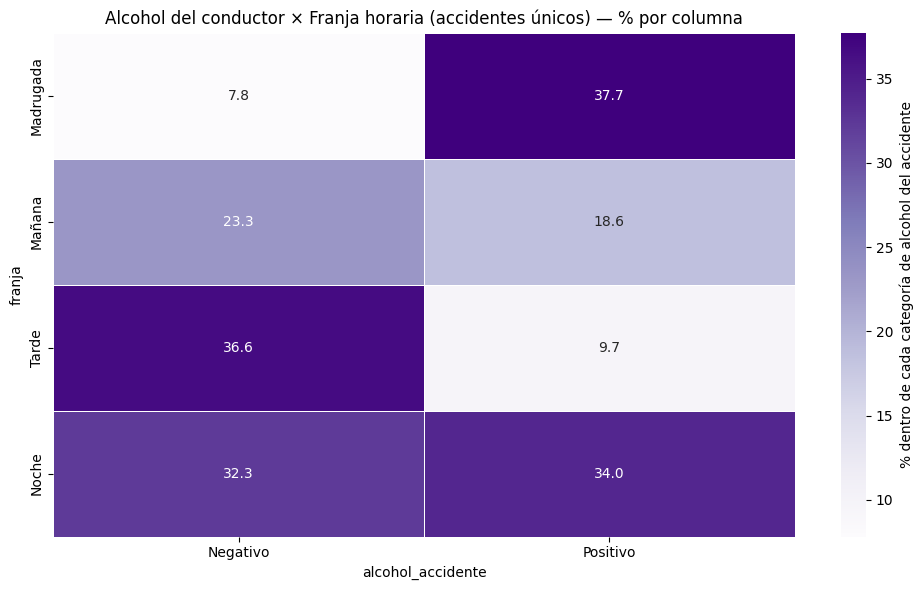


--- Resultados Chi-cuadrado ---
Valor Chi-Cuadrado: 1502.9440046113536
P-Value: 0.0
Grados de Libertad: 3

Frecuencias Esperadas:
 [[1866.41699722  144.58300278]
 [4298.97738992  333.02261008]
 [6490.2307616   502.7692384 ]
 [6062.37485125  469.62514875]]


In [65]:
# 1. Copia del dataset 
df = df_2022.copy()

# 2. Filtrar alcohol registrado (opcional pero recomendable)
df = df[df["positiva_alcohol"] != "No consta"]

# 3. Crear columna hora desde fecha_hora 
df["hora"] = df["fecha_hora"].dt.hour

# 4. Crear franja horaria 
df["franja"] = pd.cut(
    df["hora"],
    bins=[0, 6, 12, 18, 24],
    labels=["Madrugada", "Mañana", "Tarde", "Noche"],
    right=False
)

# 5. Filtrar solo conductores para clasificar el accidente
df_cond = df[df["tipo_persona"].str.lower() == "conductor"]

# 6. Clasificar accidente según alcohol del conductor
alcohol_accidente = df_cond.groupby("num_expediente")["positiva_alcohol"].apply(
    lambda x: "Positivo" if "Positivo" in x.values else "Negativo"
).reset_index().rename(columns={"positiva_alcohol": "alcohol_accidente"})

# 7. Unir clasificación al dataframe original
df = df.merge(alcohol_accidente, on="num_expediente", how="left")

# 8. Tabla absoluta: Alcohol del accidente × Franja (accidentes únicos)
tabla_abs = pd.crosstab(
    df["franja"],
    df["alcohol_accidente"],
    values=df["num_expediente"],
    aggfunc=lambda x: x.nunique()
).fillna(0)

print("Tabla absoluta:")
display(tabla_abs)

# 9. Convertir a porcentajes por columna
tabla_pct = tabla_abs.div(tabla_abs.sum(axis=0), axis=1) * 100

# 10. Heatmap en porcentaje
plt.figure(figsize=(10,6))
sns.heatmap(
    tabla_pct,
    annot=True,
    fmt=".1f",
    cmap="Purples",
    linewidths=.5,
    cbar_kws={"label": "% dentro de cada categoría de alcohol del accidente"}
)

plt.title("Alcohol del conductor × Franja horaria (accidentes únicos) — % por columna")
plt.tight_layout()
plt.show()

# 11. Test Chi-cuadrado (sobre tabla absoluta)
chi2, p, dof, expected = chi2_contingency(tabla_abs)

print("\n--- Resultados Chi-cuadrado ---")
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("\nFrecuencias Esperadas:\n", expected)

- Mayor concentración de positivos de noche y madrugada, alrededor de un 70% entre las dos.
- Distribución concentrada de negativos en Tarde.

El test Chi-cuadrado confirma que la franja horaria influye en la presencia del alcohol en conductores.

# Análisis Multivariante

C:\Users\lufue\AppData\Local\Temp\ipykernel_37100\2393322574.py:19: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  .apply(lambda x: x.unary_union.centroid)


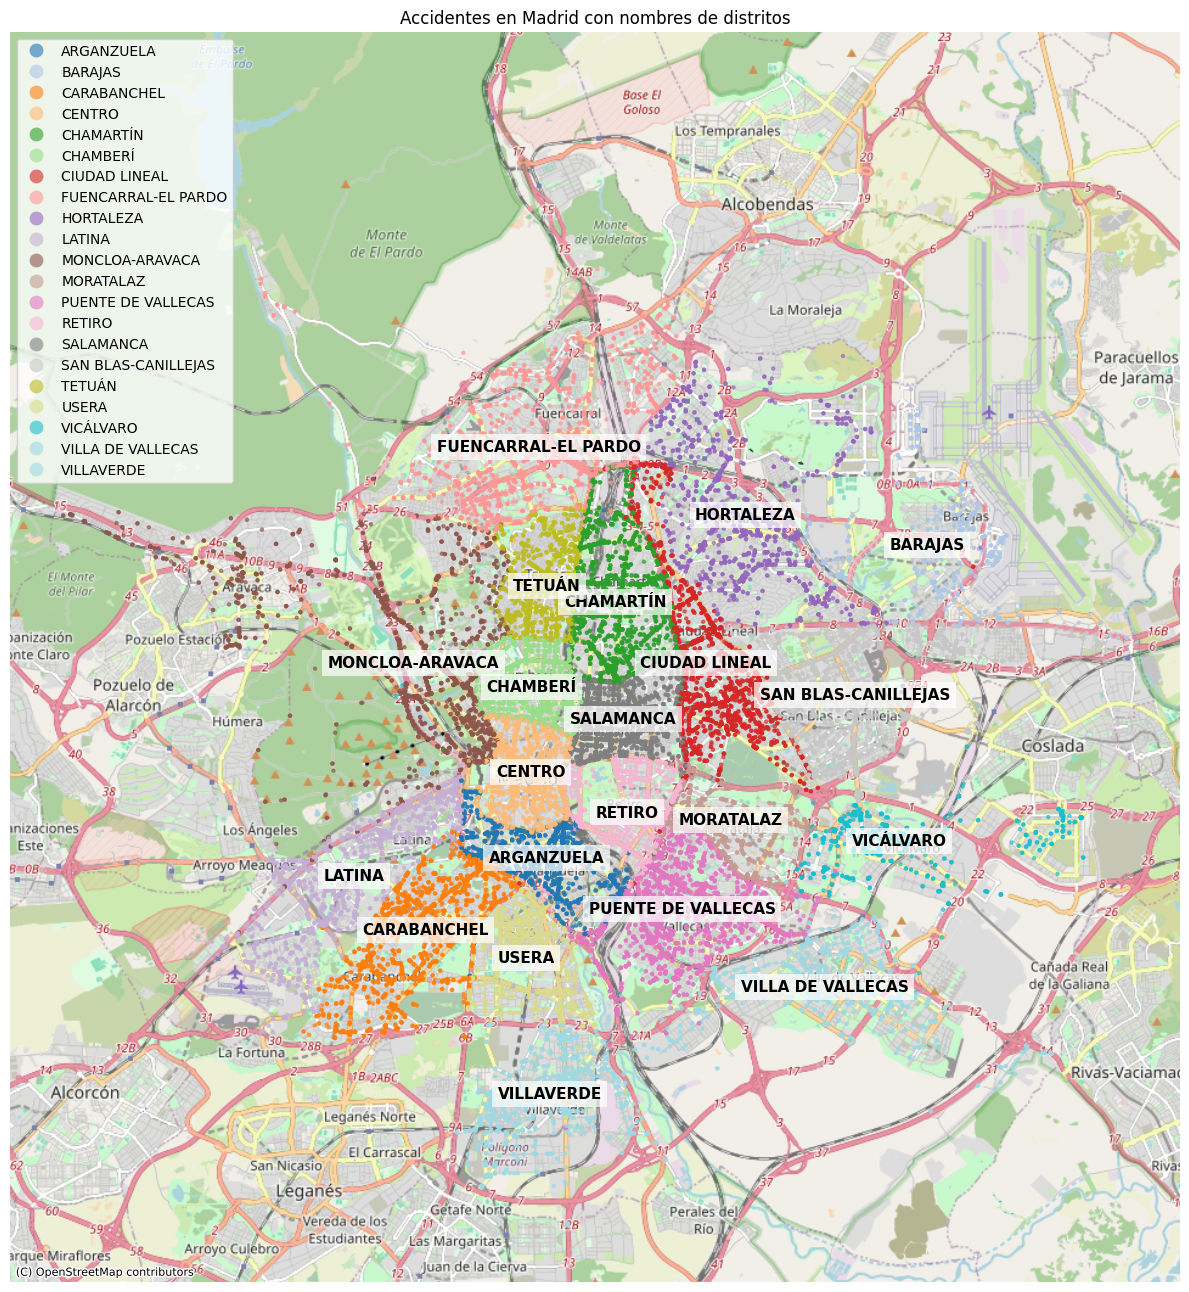

In [66]:
import geopandas as gpd
import contextily as ctx

# 1. Convertir tu dataframe a GeoDataFrame
df = df_2022.copy()

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["coordenada_x_utm"], df["coordenada_y_utm"]),
    crs="EPSG:25830"
)

# 2. Reproyectar a Web Mercator
gdf_web = gdf.to_crs(epsg=3857)

# 3. Calcular el centro aproximado de cada distrito
centros = (
    gdf_web.groupby("distrito", observed = False)["geometry"]
    .apply(lambda x: x.unary_union.centroid)
    .reset_index()
)

# 4. Crear el mapa con colores por distrito
fig, ax = plt.subplots(figsize=(12, 16))

gdf_web.plot(
    ax=ax,
    column="distrito",
    markersize=5,
    alpha=0.6,
    legend=True,
    categorical=True,
    cmap="tab20"
)

# 5. Añadir mapa base
ctx.add_basemap(
    ax,
    source=ctx.providers.OpenStreetMap.Mapnik,
    zoom=12
)

# 6. Añadir los nombres de los distritos
for _, row in centros.iterrows():
    ax.text(
        row.geometry.x,
        row.geometry.y,
        row["distrito"],
        fontsize=11,
        fontweight="bold",
        color="black",
        ha="center",
        va="center",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )

# 7. Ajustes finales
ax.set_title("Accidentes en Madrid con nombres de distritos")
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [67]:
# 1. Superficie oficial de los 21 distritos de Madrid (km²)
superficie_distritos = {
    "CENTRO": 5.23,
    "ARGANZUELA": 6.46,
    "RETIRO": 5.47,
    "SALAMANCA": 5.38,
    "CHAMARTÍN": 5.99,
    "TETUÁN": 5.38,
    "CHAMBERÍ": 4.69,
    "FUENCARRAL-EL PARDO": 237.81,
    "MONCLOA-ARAVACA": 46.65,
    "LATINA": 25.41,
    "CARABANCHEL": 14.76,
    "USERA": 7.75,
    "PUENTE DE VALLECAS": 14.89,
    "MORATALAZ": 6.34,
    "CIUDAD LINEAL": 11.43,
    "HORTALEZA": 27.41,
    "VILLAVERDE": 20.29,
    "VILLA DE VALLECAS": 48.34,
    "VICÁLVARO": 14.40,
    "SAN BLAS-CANILLEJAS": 22.36,
    "BARAJAS": 41.94
}

df_superficie = pd.DataFrame(
    list(superficie_distritos.items()),
    columns=["distrito", "area_km2"]
)

# 2. Copia del dataframe original
df_acc = df_2022.copy()

# 3. Contar EXPEDIENTES ÚNICOS por distrito
acc_por_distrito = (
    df_acc.groupby("distrito", observed = False)["num_expediente"]
    .nunique()
    .reset_index(name="n_accidentes_unicos")
)

# 4. Unir accidentes únicos + superficie
df_densidad = acc_por_distrito.merge(df_superficie, on="distrito", how="left")

# 5. Calcular densidad REAL
df_densidad["densidad_accidentes_km2"] = (
    df_densidad["n_accidentes_unicos"] / df_densidad["area_km2"]
)

# 6. Ordenar de mayor a menor densidad
df_densidad = df_densidad.sort_values(
    "densidad_accidentes_km2", ascending=False
)

df_densidad

distrito  n_accidentes_unicos  area_km2  \
14            SALAMANCA                 1519      5.38   
4             CHAMARTÍN                 1416      5.99   
3                CENTRO                 1205      5.23   
5              CHAMBERÍ                 1037      4.69   
13               RETIRO                  947      5.47   
16               TETUÁN                  894      5.38   
0            ARGANZUELA                  890      6.46   
6         CIUDAD LINEAL                 1286     11.43   
17                USERA                  826      7.75   
12   PUENTE DE VALLECAS                 1459     14.89   
11            MORATALAZ                  538      6.34   
2           CARABANCHEL                 1225     14.76   
15  SAN BLAS-CANILLEJAS                 1022     22.36   
9                LATINA                  987     25.41   
20           VILLAVERDE                  643     20.29   
8             HORTALEZA                  801     27.41   
10      MONCLOA-ARAVACA                 1146     46.65   
18            VICÁLVARO                  329     14.40   
19    VILLA DE VALLECAS                  549     48.34   
1               BARAJAS                  384     41.94   
7   FUENCARRAL-EL PARDO                 1105    237.81   

    densidad_accidentes_km2  
14               282.342007  
4                236.393990  
3                230.401530  
5                221.108742  
13               173.126143  
16               166.171004  
0                137.770898  
6                112.510936  
17               106.580645  
12                97.985225  
11                84.858044  
2                 82.994580  
15                45.706619  
9                 38.842975  
20                31.690488  
8                 29.222911  
10                24.565916  
18                22.847222  
19                11.357054  
1                  9.155937  
7                  4.646567

El Scatterplot muestra zonas con alta densidad visual (muchos puntos superpuestos) y el cálculo de densidad por km2 confirma si esa concetración es relativa al tamaño del distrito y efectivamente vemos que el top 5 en función a su tamaño se concentran de la siguiente forma:

- Distrito de Salamanca
- Distrito de Chamartín
- Distrito de Centro
- Distrito de Chamberí
- Distrito de Retiro